<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook is created to handle the outliers in the data in different methods.

<h2><font color=slateblue> Preparing the tools </font></h2>

In [1]:
# Regular EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the style
plt.style.use("ggplot")

<h2><font color=slateblue> Handle outliers </font></h2>

<h3><font color=steelblue>Setup</font></h3>

<h4><font color=mediumvioletred>Read CSV files </font></h4>

In [2]:
# read prepared daily dataset csv file
df = pd.read_csv("data/df_prepared_full_data.csv")
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
2174,5651,12389.0,13.298985,91.296357,1.993067,102.563209,413.296155,2021,3,7,6,66
512,5612,7166.0,35.519646,250.669737,3.458055,25.890228,422.389729,2021,1,16,5,16
7337,5655,4421.0,9.094771,230.231795,2.113079,247.884525,429.304501,2021,8,11,2,223
10135,5657,14215.0,15.902360,173.754979,1.982424,42.107080,120.767487,2021,11,4,3,308
1572,5642,2641.0,9.969110,233.262581,5.493446,47.748013,753.441606,2021,2,17,2,48


In [3]:
# read prepared weekly dataset csv file
df_weekly = pd.read_csv("data/df_prepared_full_data_weekly.csv")
df_weekly.sample(5)

,Unnamed: 0,PC4,week_number,pm2.5,wd,ws,ssrd,blh,people_number,season
1008,1008,5643,22,9.931535,147.750003,2.732487,261.503829,576.654970,51185.0,1
254,254,5616,20,8.576589,212.911923,4.736333,183.653978,883.756467,78103.0,1
609,609,5626,46,32.812274,156.739322,3.092063,32.360310,360.529148,52845.0,3
1328,1328,5654,13,12.737836,168.447140,3.166507,172.821397,492.726374,29033.0,1
472,472,5624,3,11.098129,226.778438,5.565195,31.351672,742.106449,17969.0,4


<h4><font color=mediumvioletred>Create a method to visualize distribution </font></h4>

In [4]:
def visualizeDistribution(df, column, label):
    # Subplot of distribution
    fig, (ax0, ax1) = plt.subplots(nrows=2,
                                    ncols=1,
                                    figsize=(30, 20),
                                    sharex=False)

    # Add data to ax0
    red_square = dict(markerfacecolor="lightblue", marker="s")
    ax0.boxplot(df[column], vert=False, flierprops=red_square);
    # Add data to ax1
    ax1.hist(df[column], bins=30, color="lightblue");

    # Customize ax0
    ax0.set(title="Boxplot " + label);

    # Customize ax1
    ax1.set(title="Histogram " + label,
            xlabel=label,
            ylabel="Distribution");

    # Add a title to the figure
    fig.suptitle("The distribution of " + label, fontsize=20, fontweight="bold");

<h4><font color=mediumvioletred>Check pollution distribution in df</font></h4>

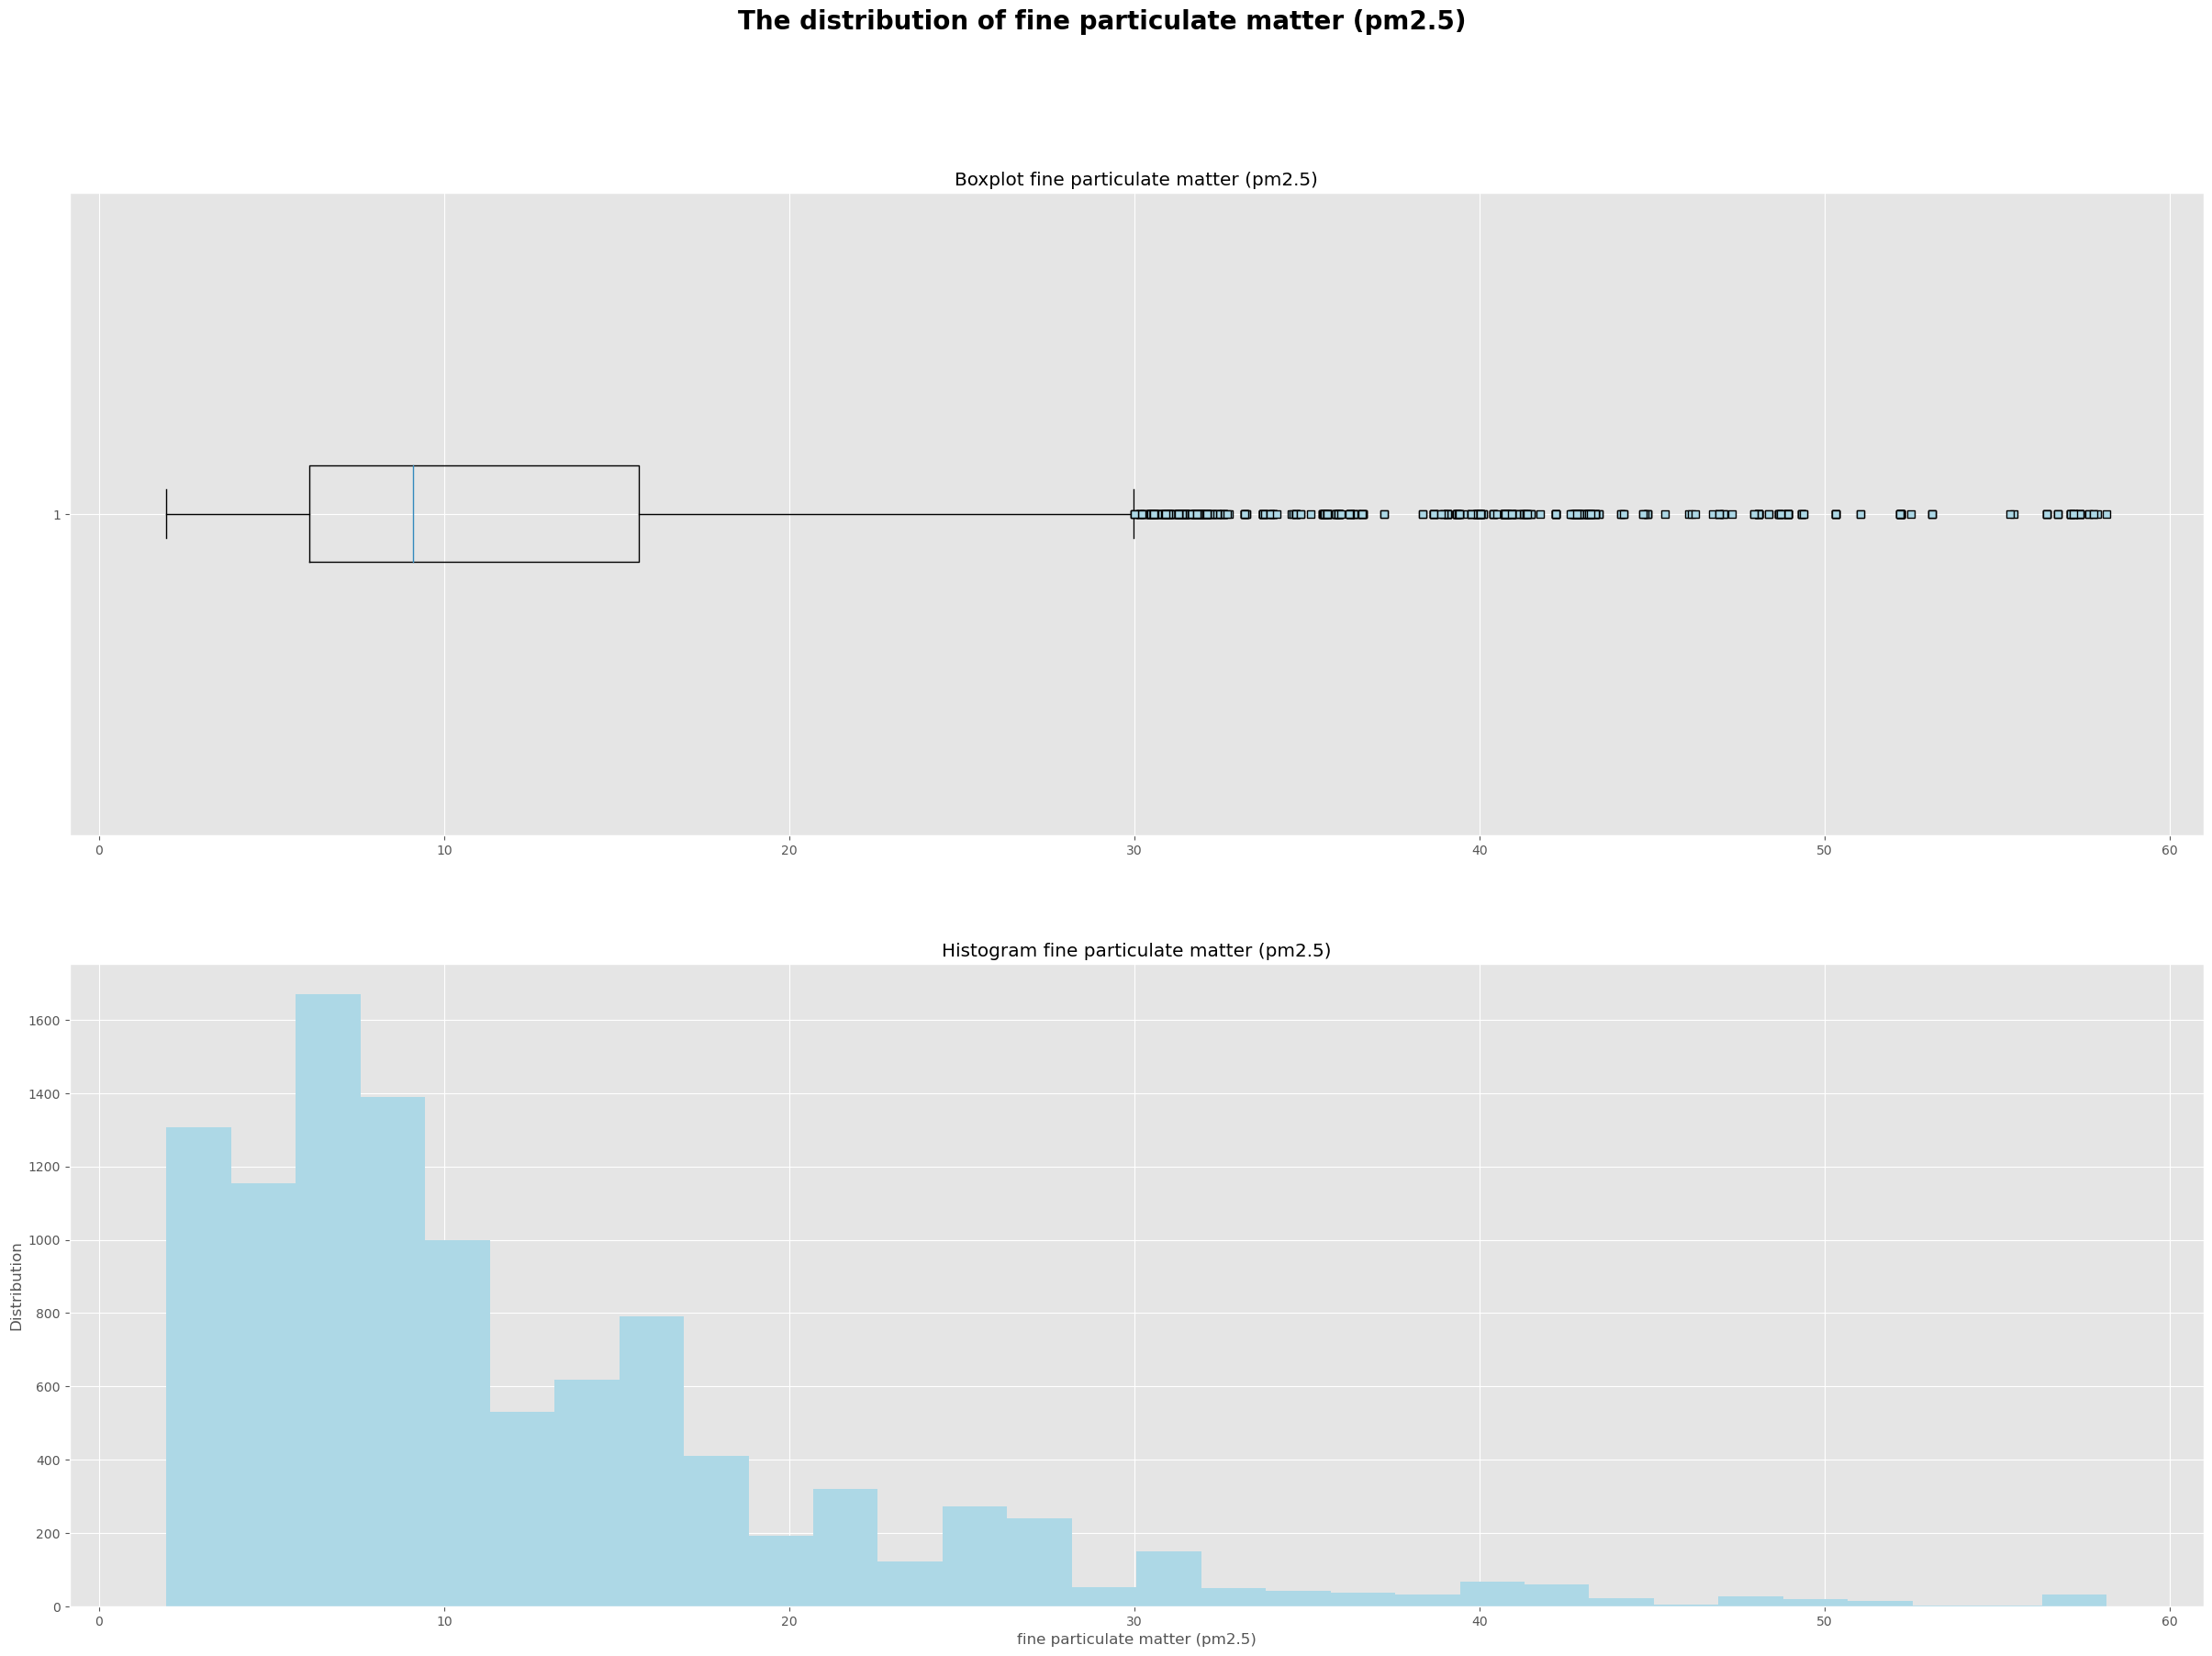

In [5]:
visualizeDistribution(df, "pm2.5", "fine particulate matter (pm2.5)")

<h3><font color=steelblue>Remove pm2.5 outliers </font></h3>

<h4><font color=mediumvioletred>Create a copy of the dataframe</font></h4>

In [6]:
# make a copy of the dataframe
df_removed_outliers = df.copy()

<h4><font color=mediumvioletred>Remove outliers</font></h4>

In [7]:
df_removed_outliers = df_removed_outliers.drop(df_removed_outliers.loc[df_removed_outliers['pm2.5'] >= 30].index)

<h4><font color=mediumvioletred>Check pollution distribution in df_removed_outliers</font></h4>

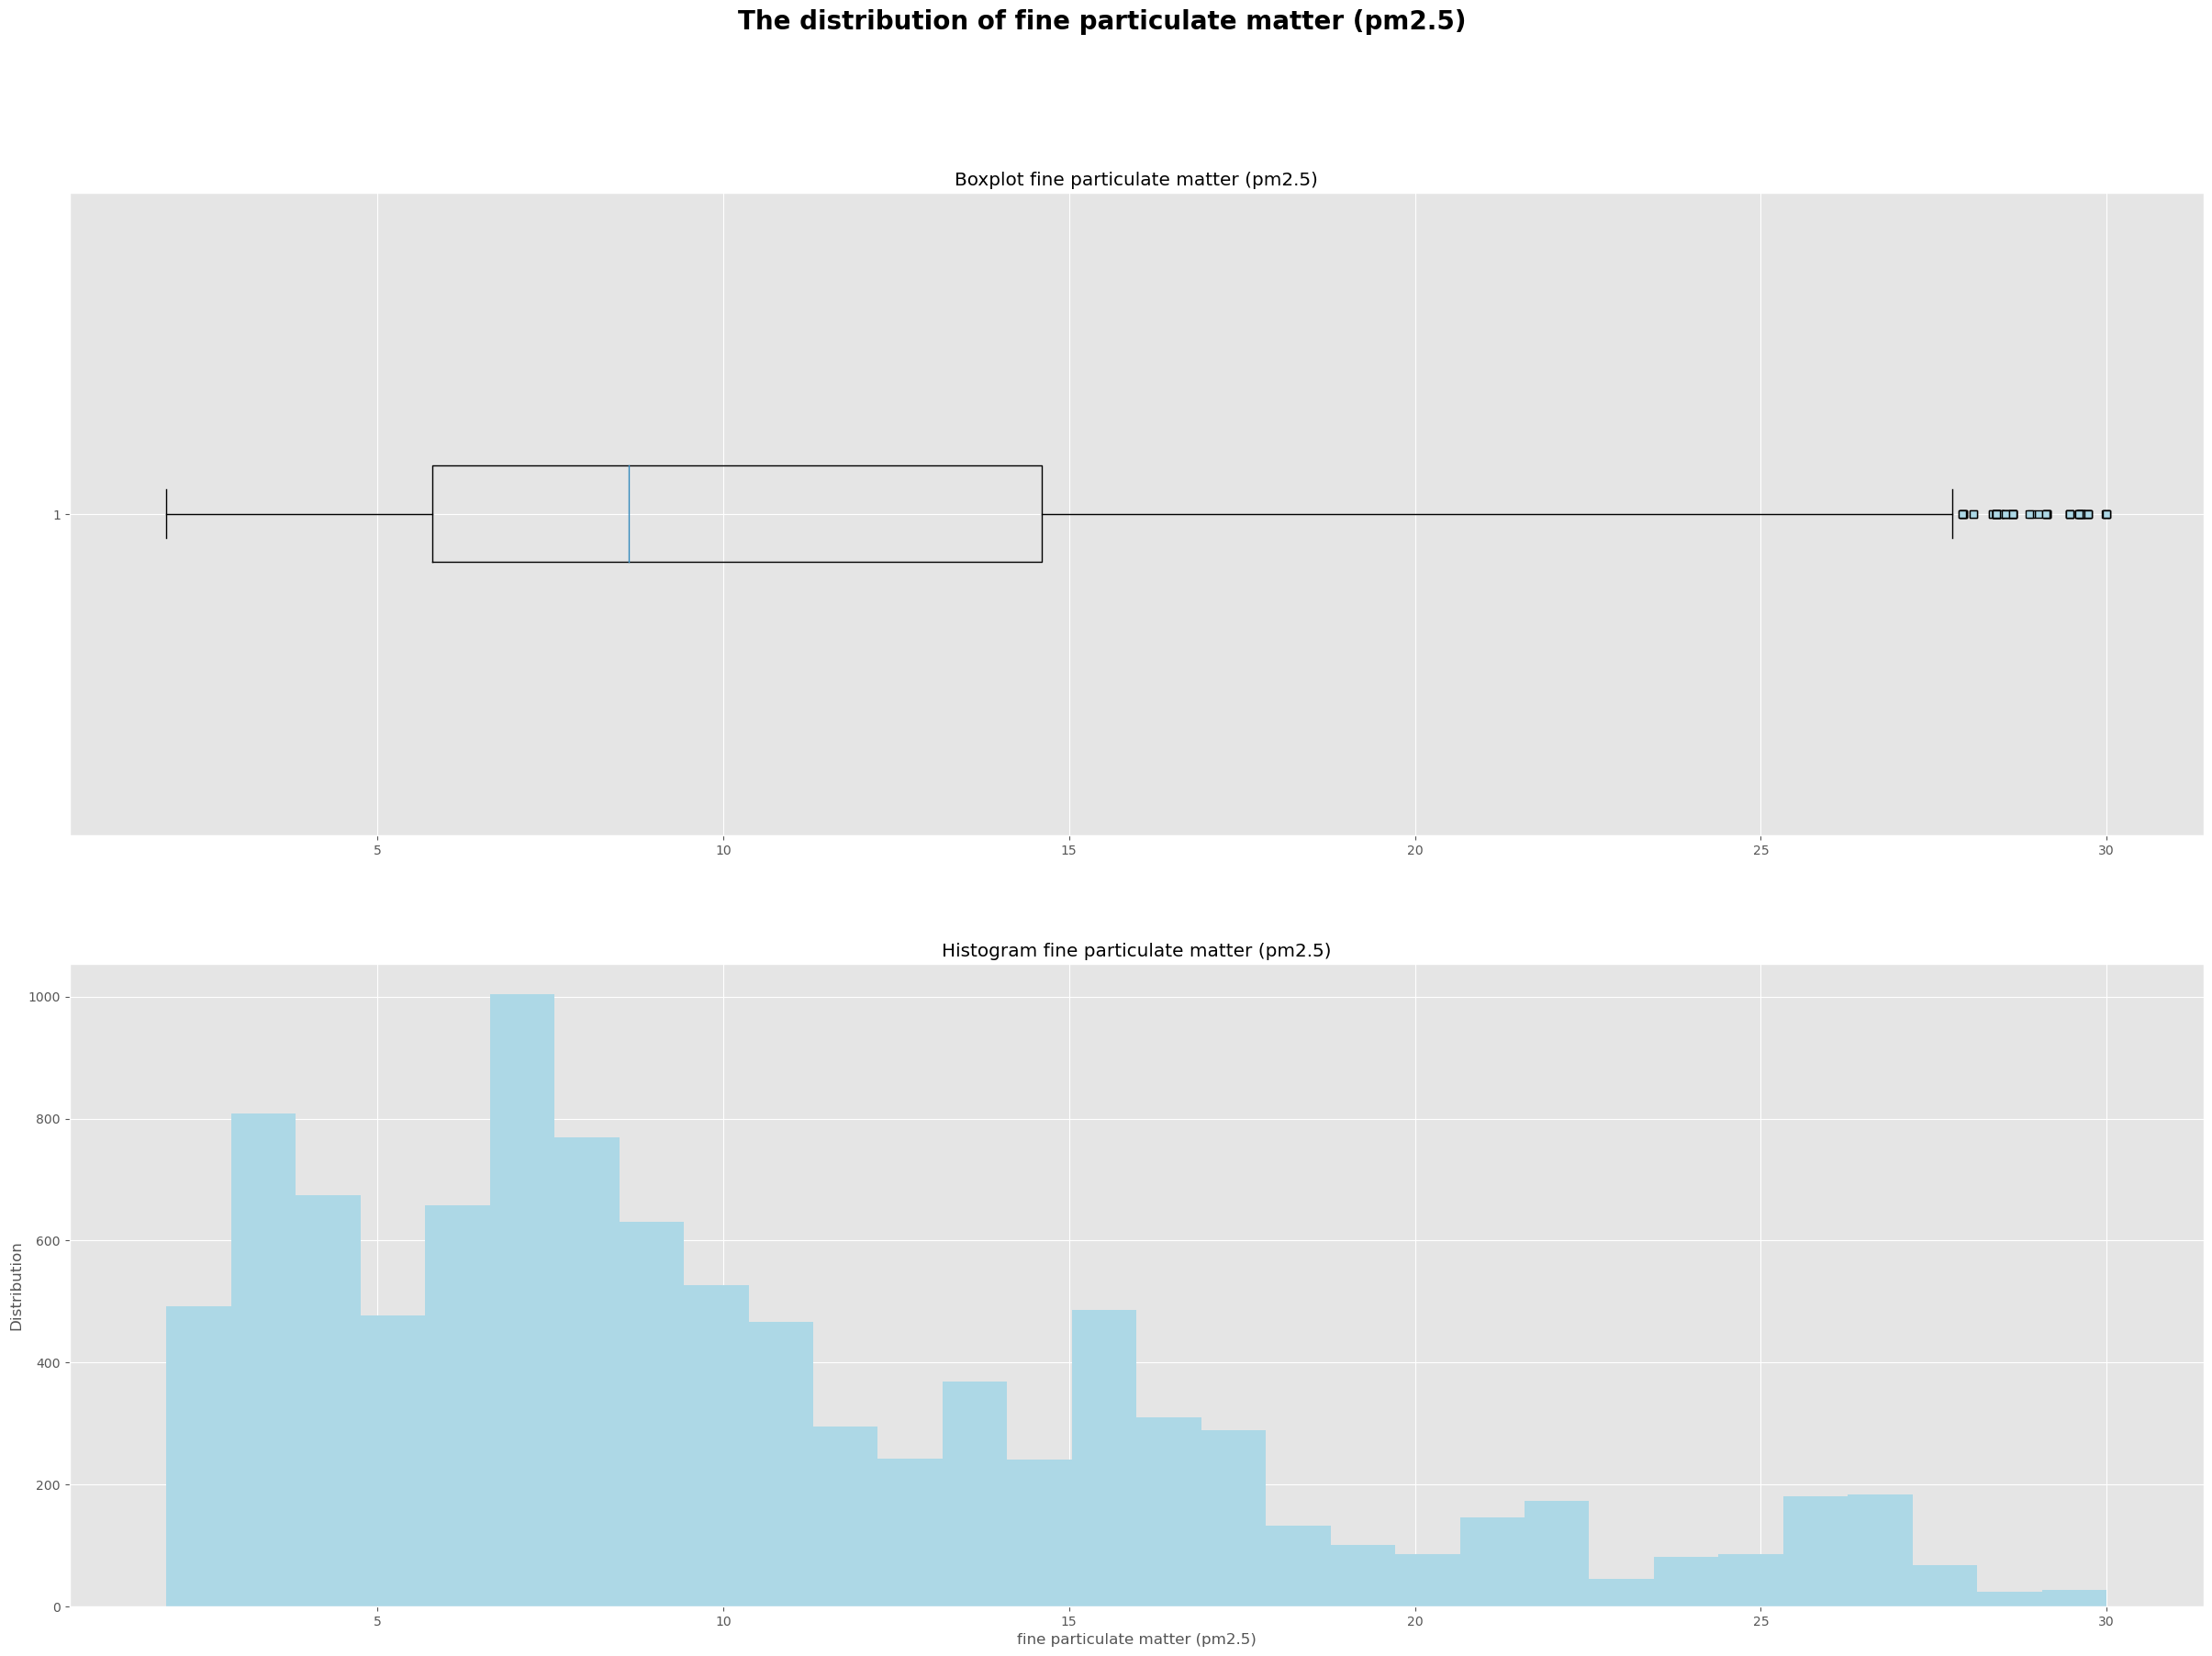

In [8]:
visualizeDistribution(df_removed_outliers, "pm2.5", "fine particulate matter (pm2.5)")

<h4><font color=mediumvioletred>Export df_removed_pollution_outliers to csv</font></h4>

In [9]:
df_removed_outliers.to_csv("data/df_removed_pollution_outliers.csv", index=False)

<h3><font color=steelblue>Replace pm2.5 outliers with median </font></h3>

<h4><font color=mediumvioletred>Create a copy of the dataframe</font></h4>

In [10]:
# make a copy of the dataframe
df_replaced_median_outliers = df.copy()

<h4><font color=mediumvioletred>Replace outliers with median</font></h4>

In [11]:
df_replaced_median_outliers.loc[df_replaced_median_outliers['pm2.5'] >= 27, 'pm2.5'] = df_replaced_median_outliers['pm2.5'].median()

<h4><font color=mediumvioletred>Check pollution distribution in df_replaced_median_outliers</font></h4>

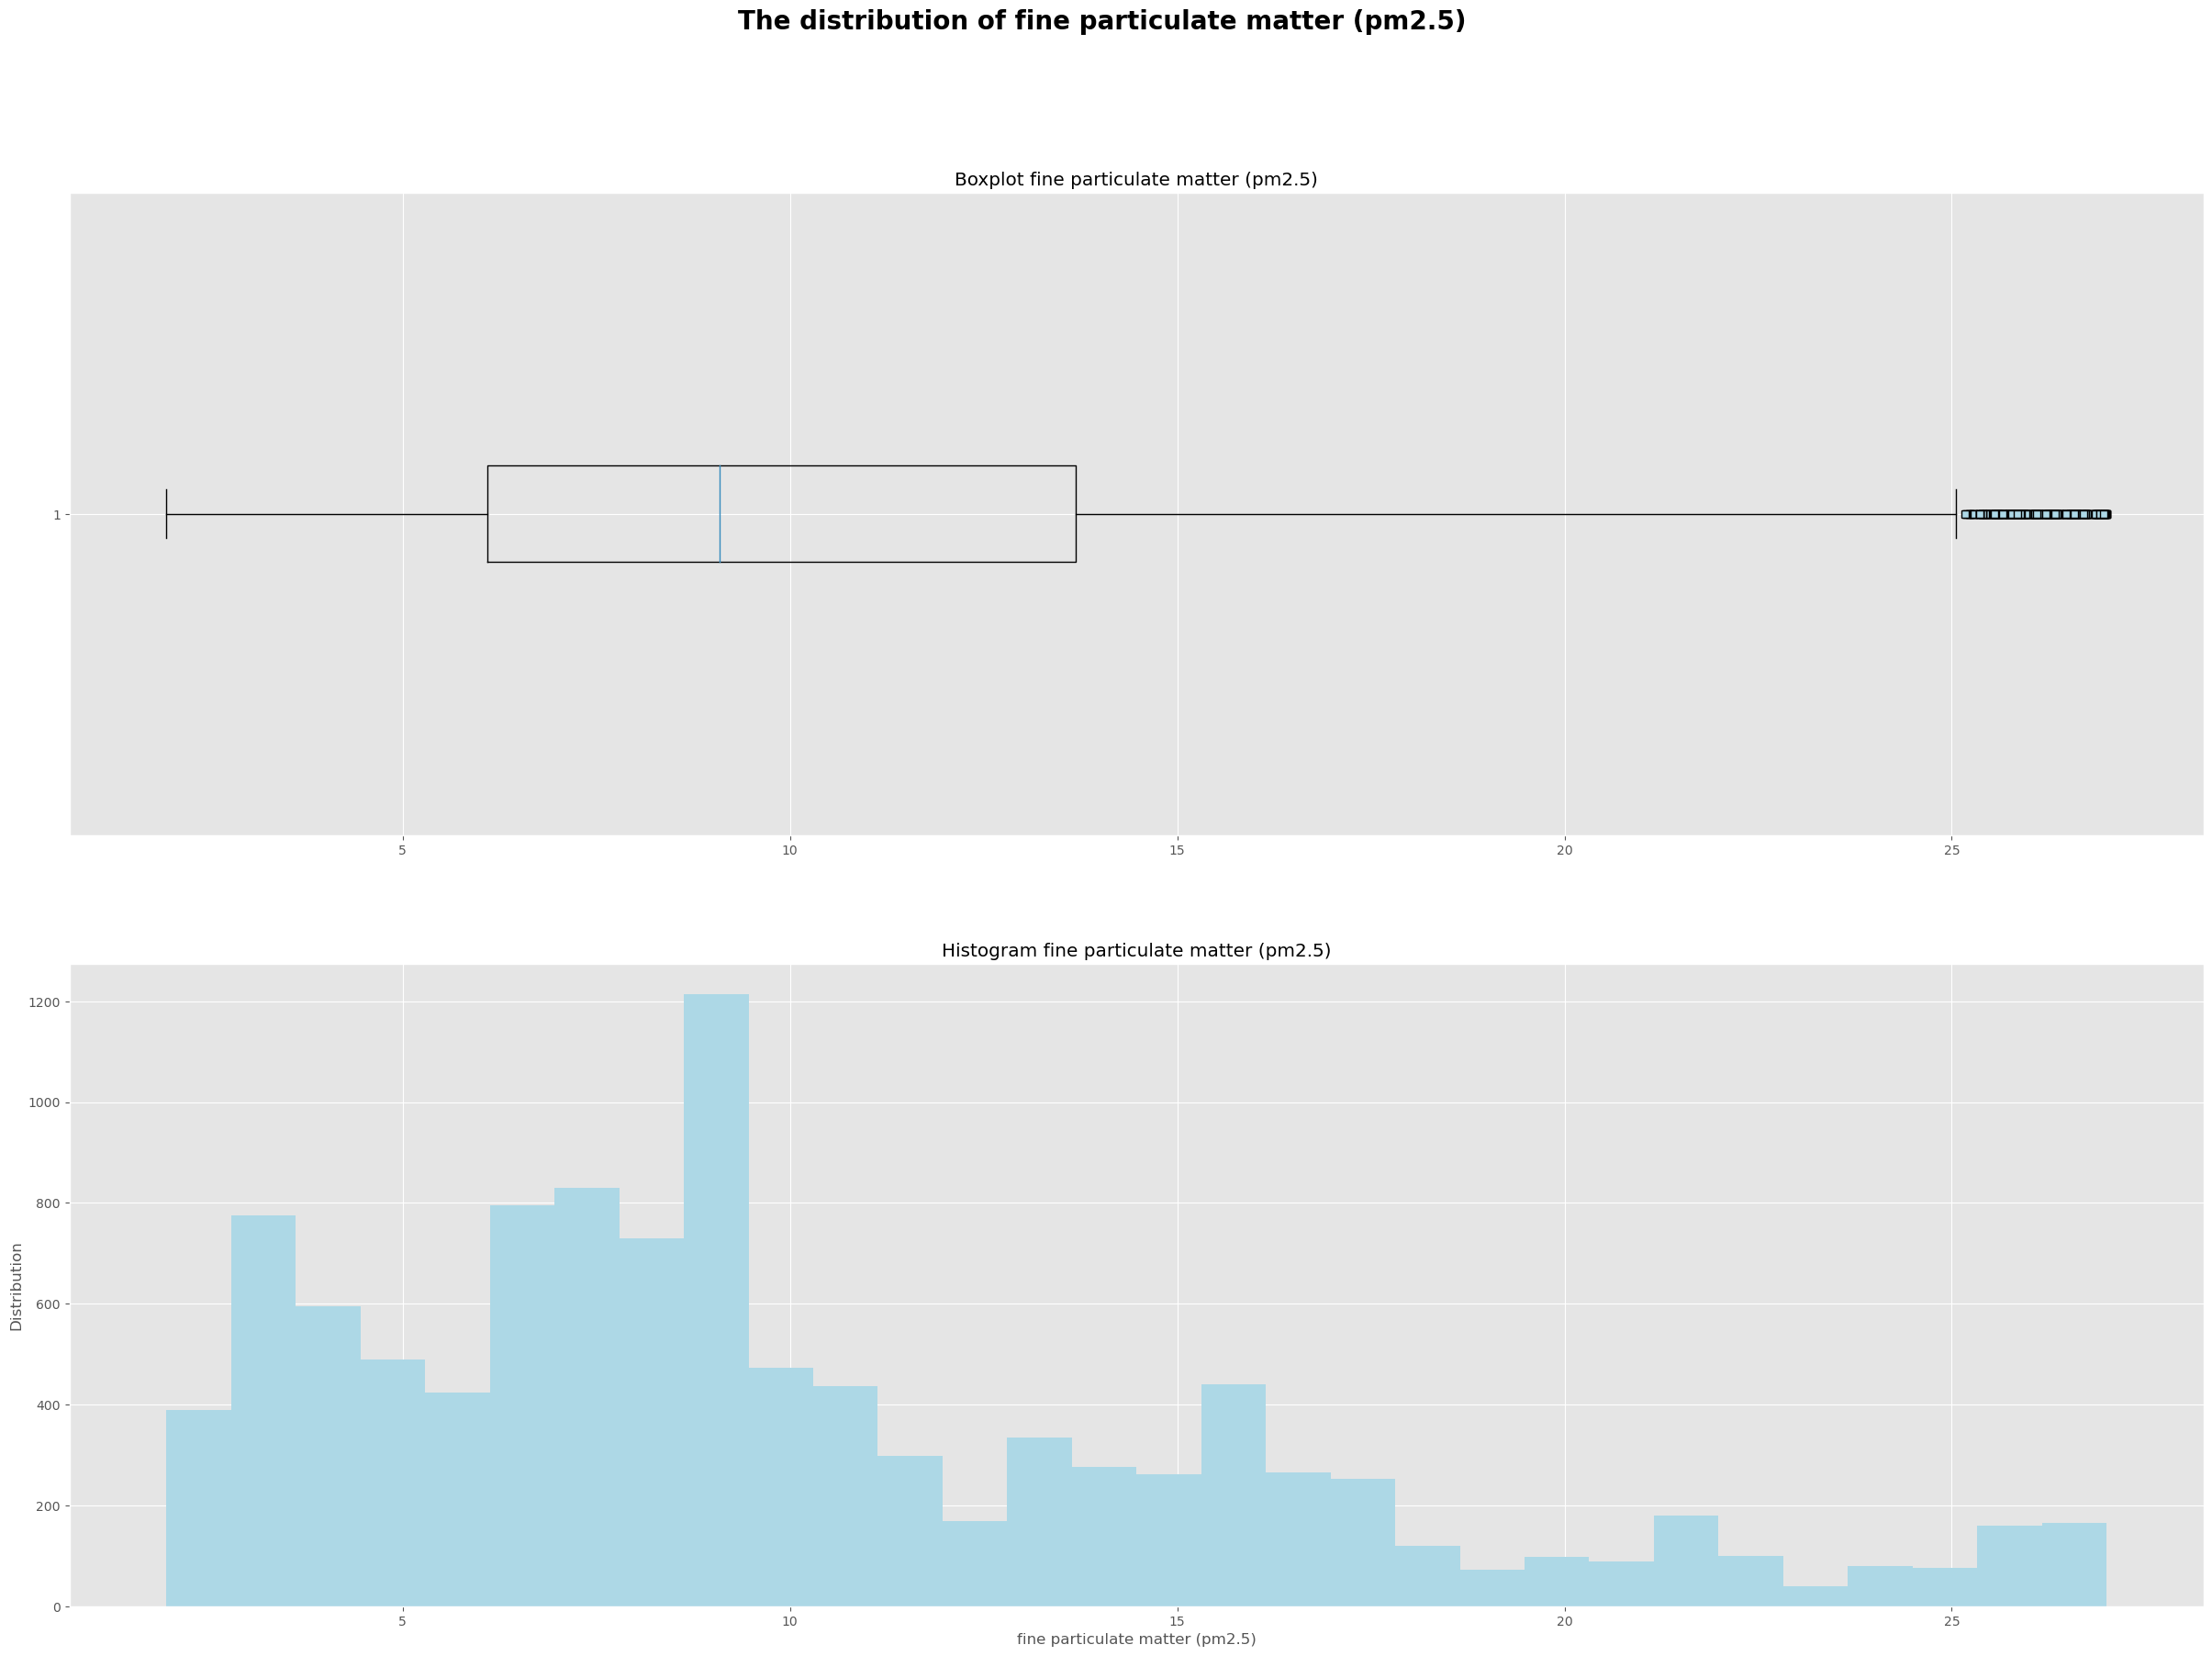

In [12]:
visualizeDistribution(df_replaced_median_outliers, "pm2.5", "fine particulate matter (pm2.5)")

<h4><font color=mediumvioletred>Export df_replaced_median_outliers to csv</font></h4>

In [13]:
df_replaced_median_outliers.to_csv("data/df_replaced_pollution_median_outliers.csv", index=False)

<h3><font color=steelblue>Replace pm2.5, people number, boundary layer height and wind speed outliers with Interquartile Range (IQR)</font></h3>

Resource: https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893

<h4><font color=mediumvioletred>Create a method to replace outliers with IQR</font></h4>

In [14]:
def replace_outliers_iqr(df, column):    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width * IQR)
    upper_whisker = Q3 + (whisker_width * IQR)
    df[column] = np.where(df[column] > upper_whisker, upper_whisker, np.where(df[column] < lower_whisker, lower_whisker, df[column]))

<h4><font color=mediumvioletred>Create a copy of the dataframe</font></h4>

In [15]:
df_replaced_iqr_outliers = df.copy()

<h4><font color=mediumvioletred>Replace pm2.5 outliers </font></h4>

In [16]:
 replace_outliers_iqr(df_replaced_iqr_outliers, "pm2.5")

<h4><font color=mediumvioletred>Check pollution distribution in df_replaced_iqr_outliers</font></h4>

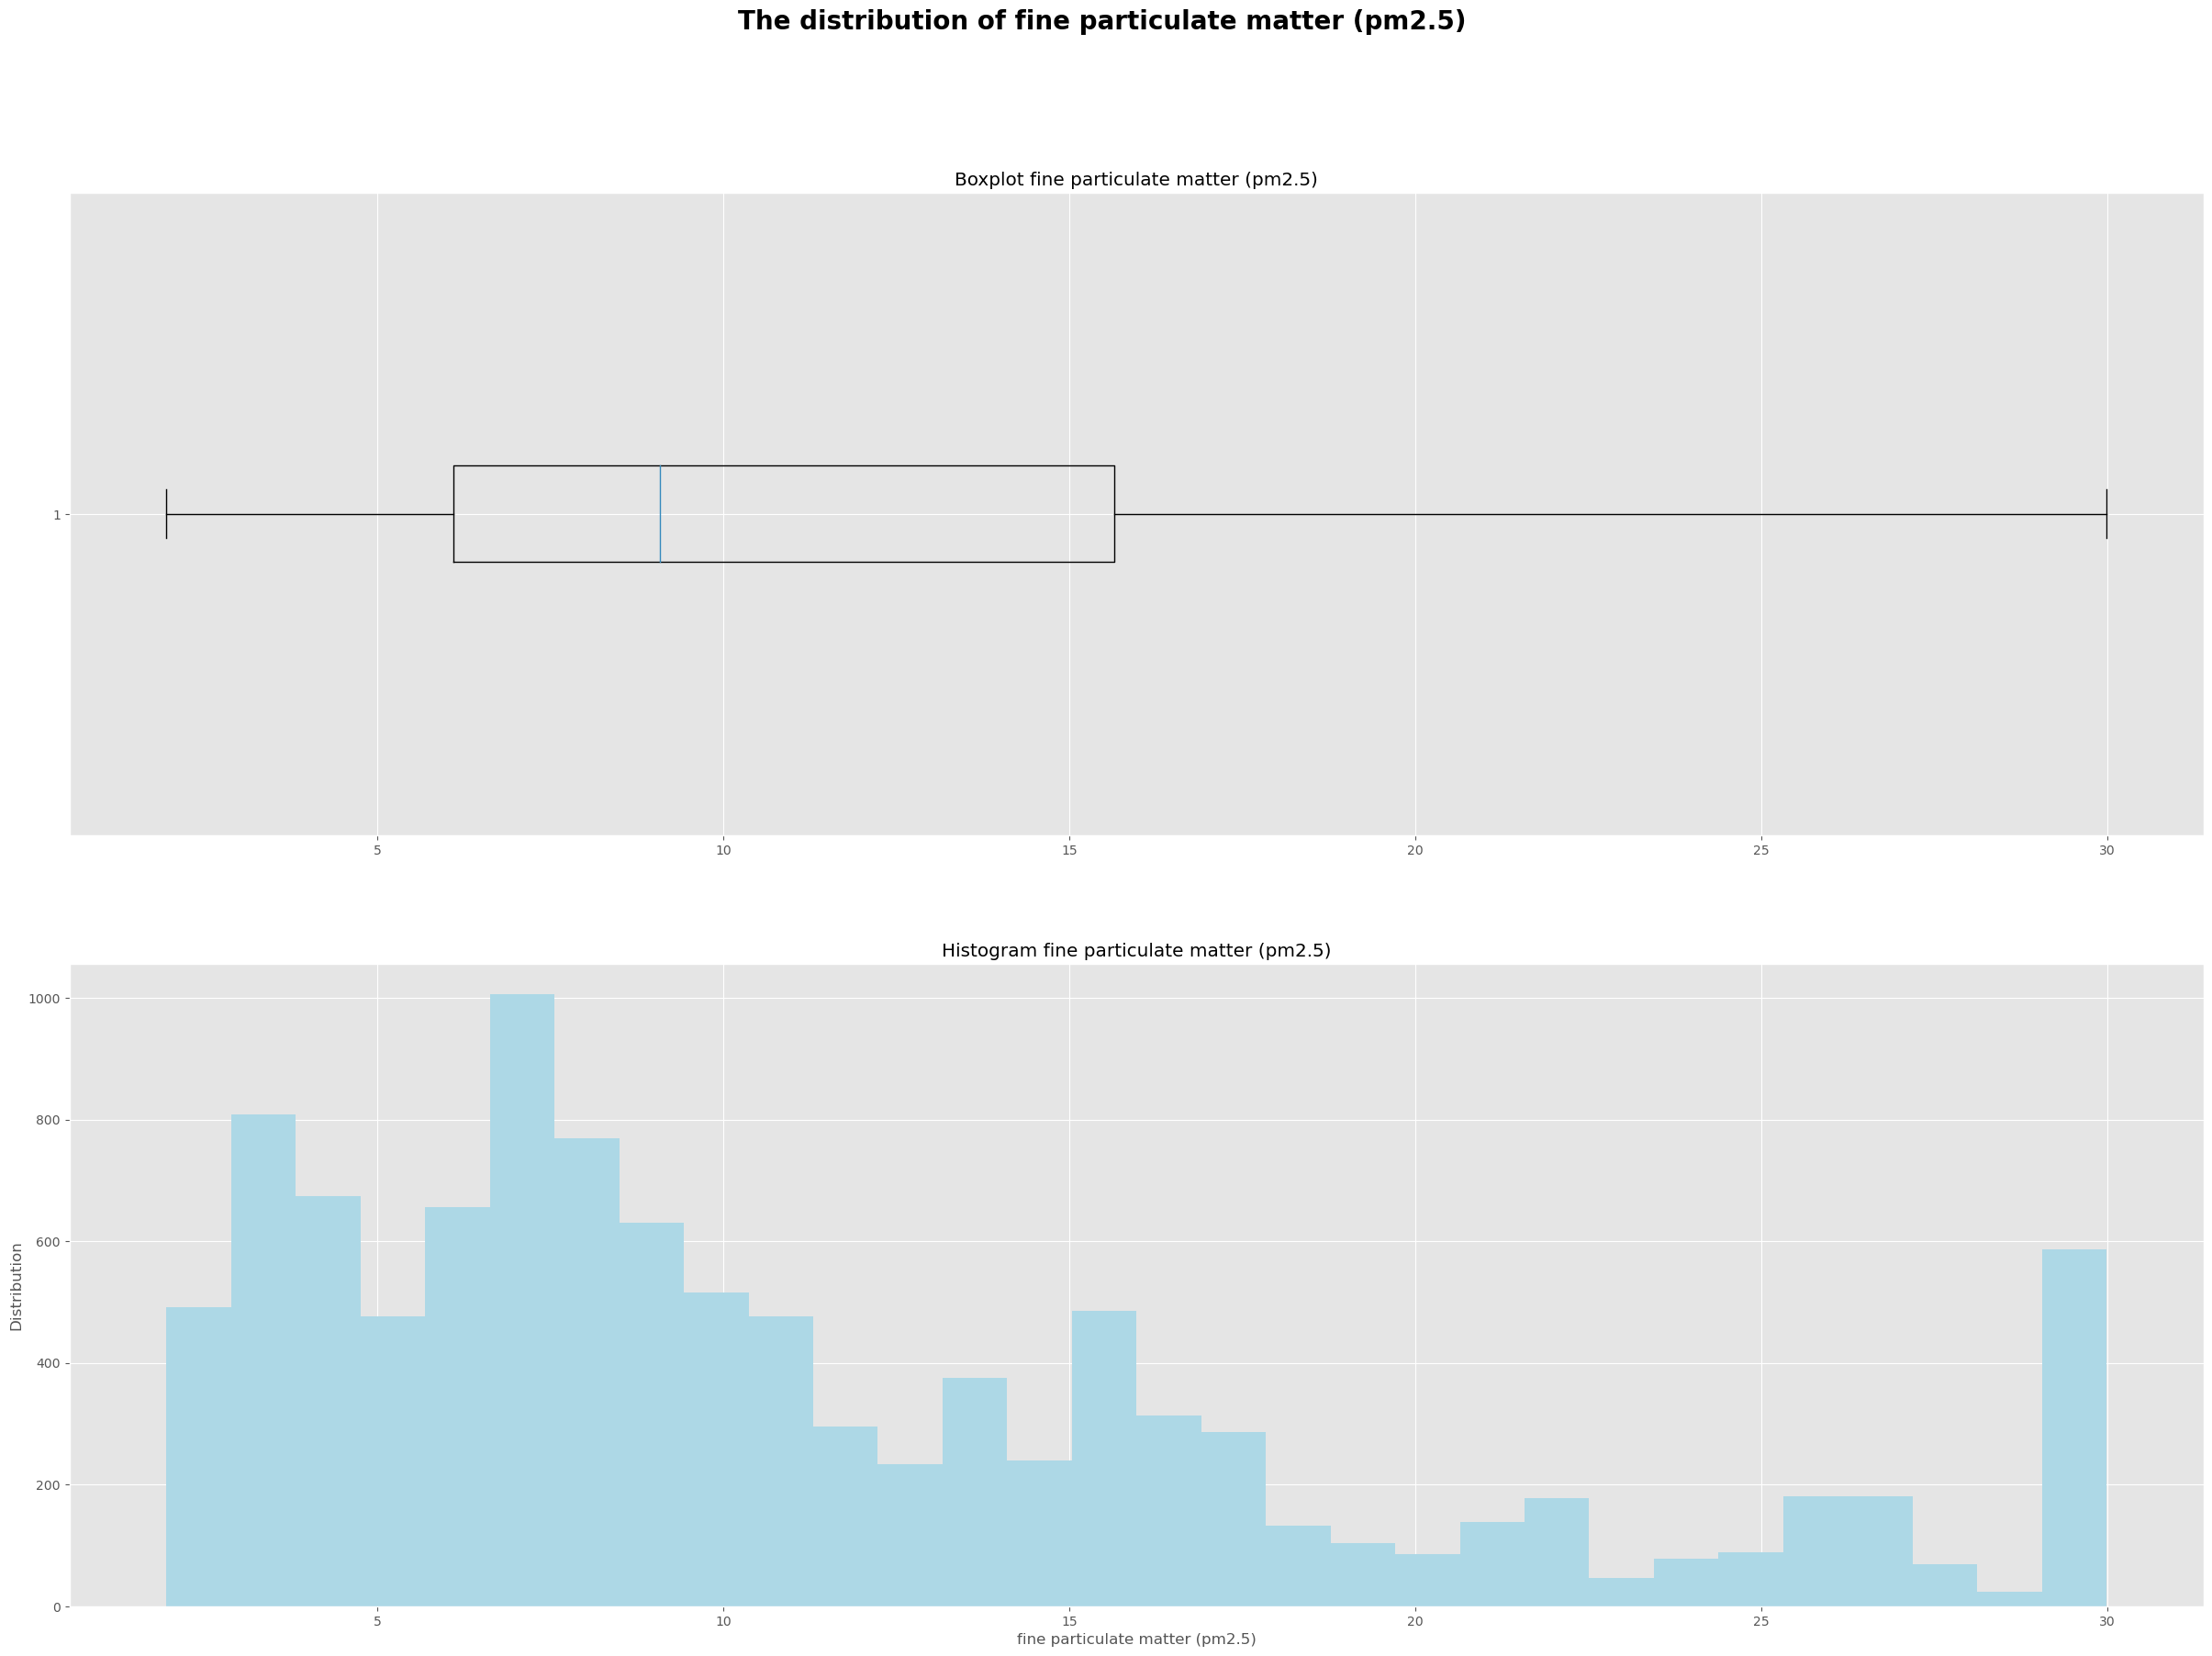

In [17]:
visualizeDistribution(df_replaced_iqr_outliers, "pm2.5", "fine particulate matter (pm2.5)")

<h4><font color=mediumvioletred>Replace people number outliers </font></h4>

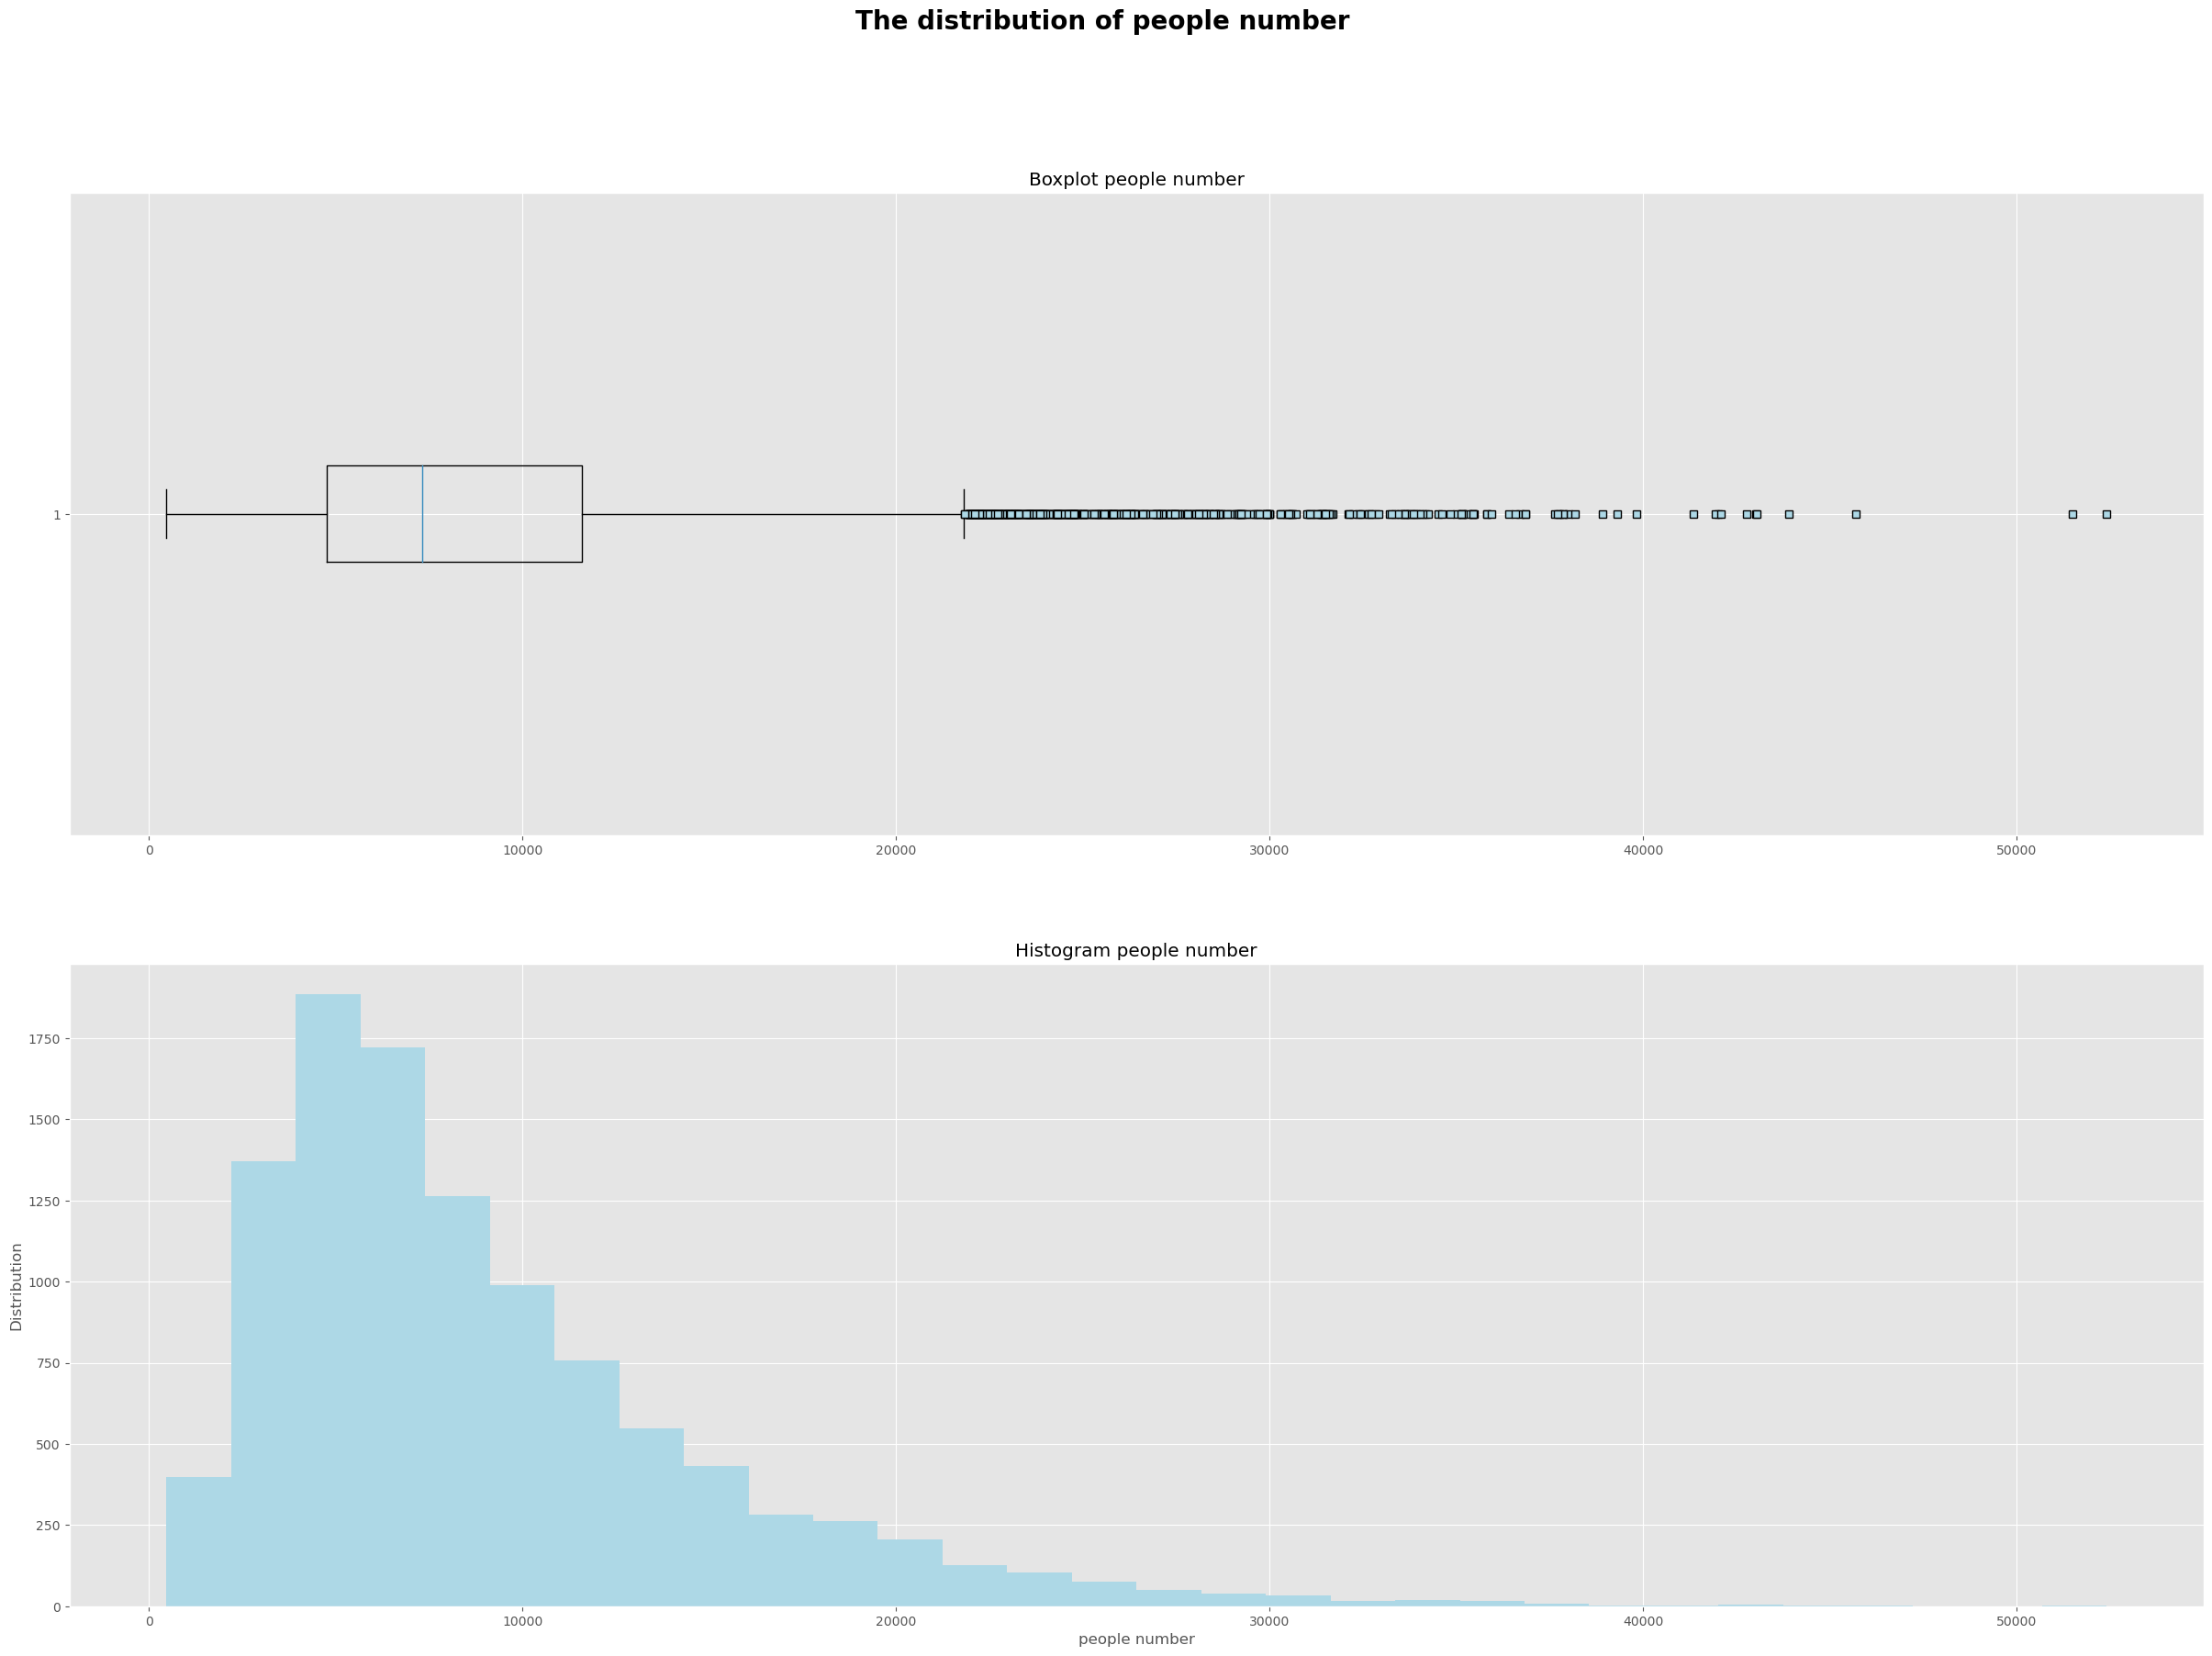

In [18]:
visualizeDistribution(df, "people_number", "people number")

In [19]:
replace_outliers_iqr(df_replaced_iqr_outliers, "people_number")

<h4><font color=mediumvioletred>Check people number distribution in df_replaced_iqr_outliers</font></h4>

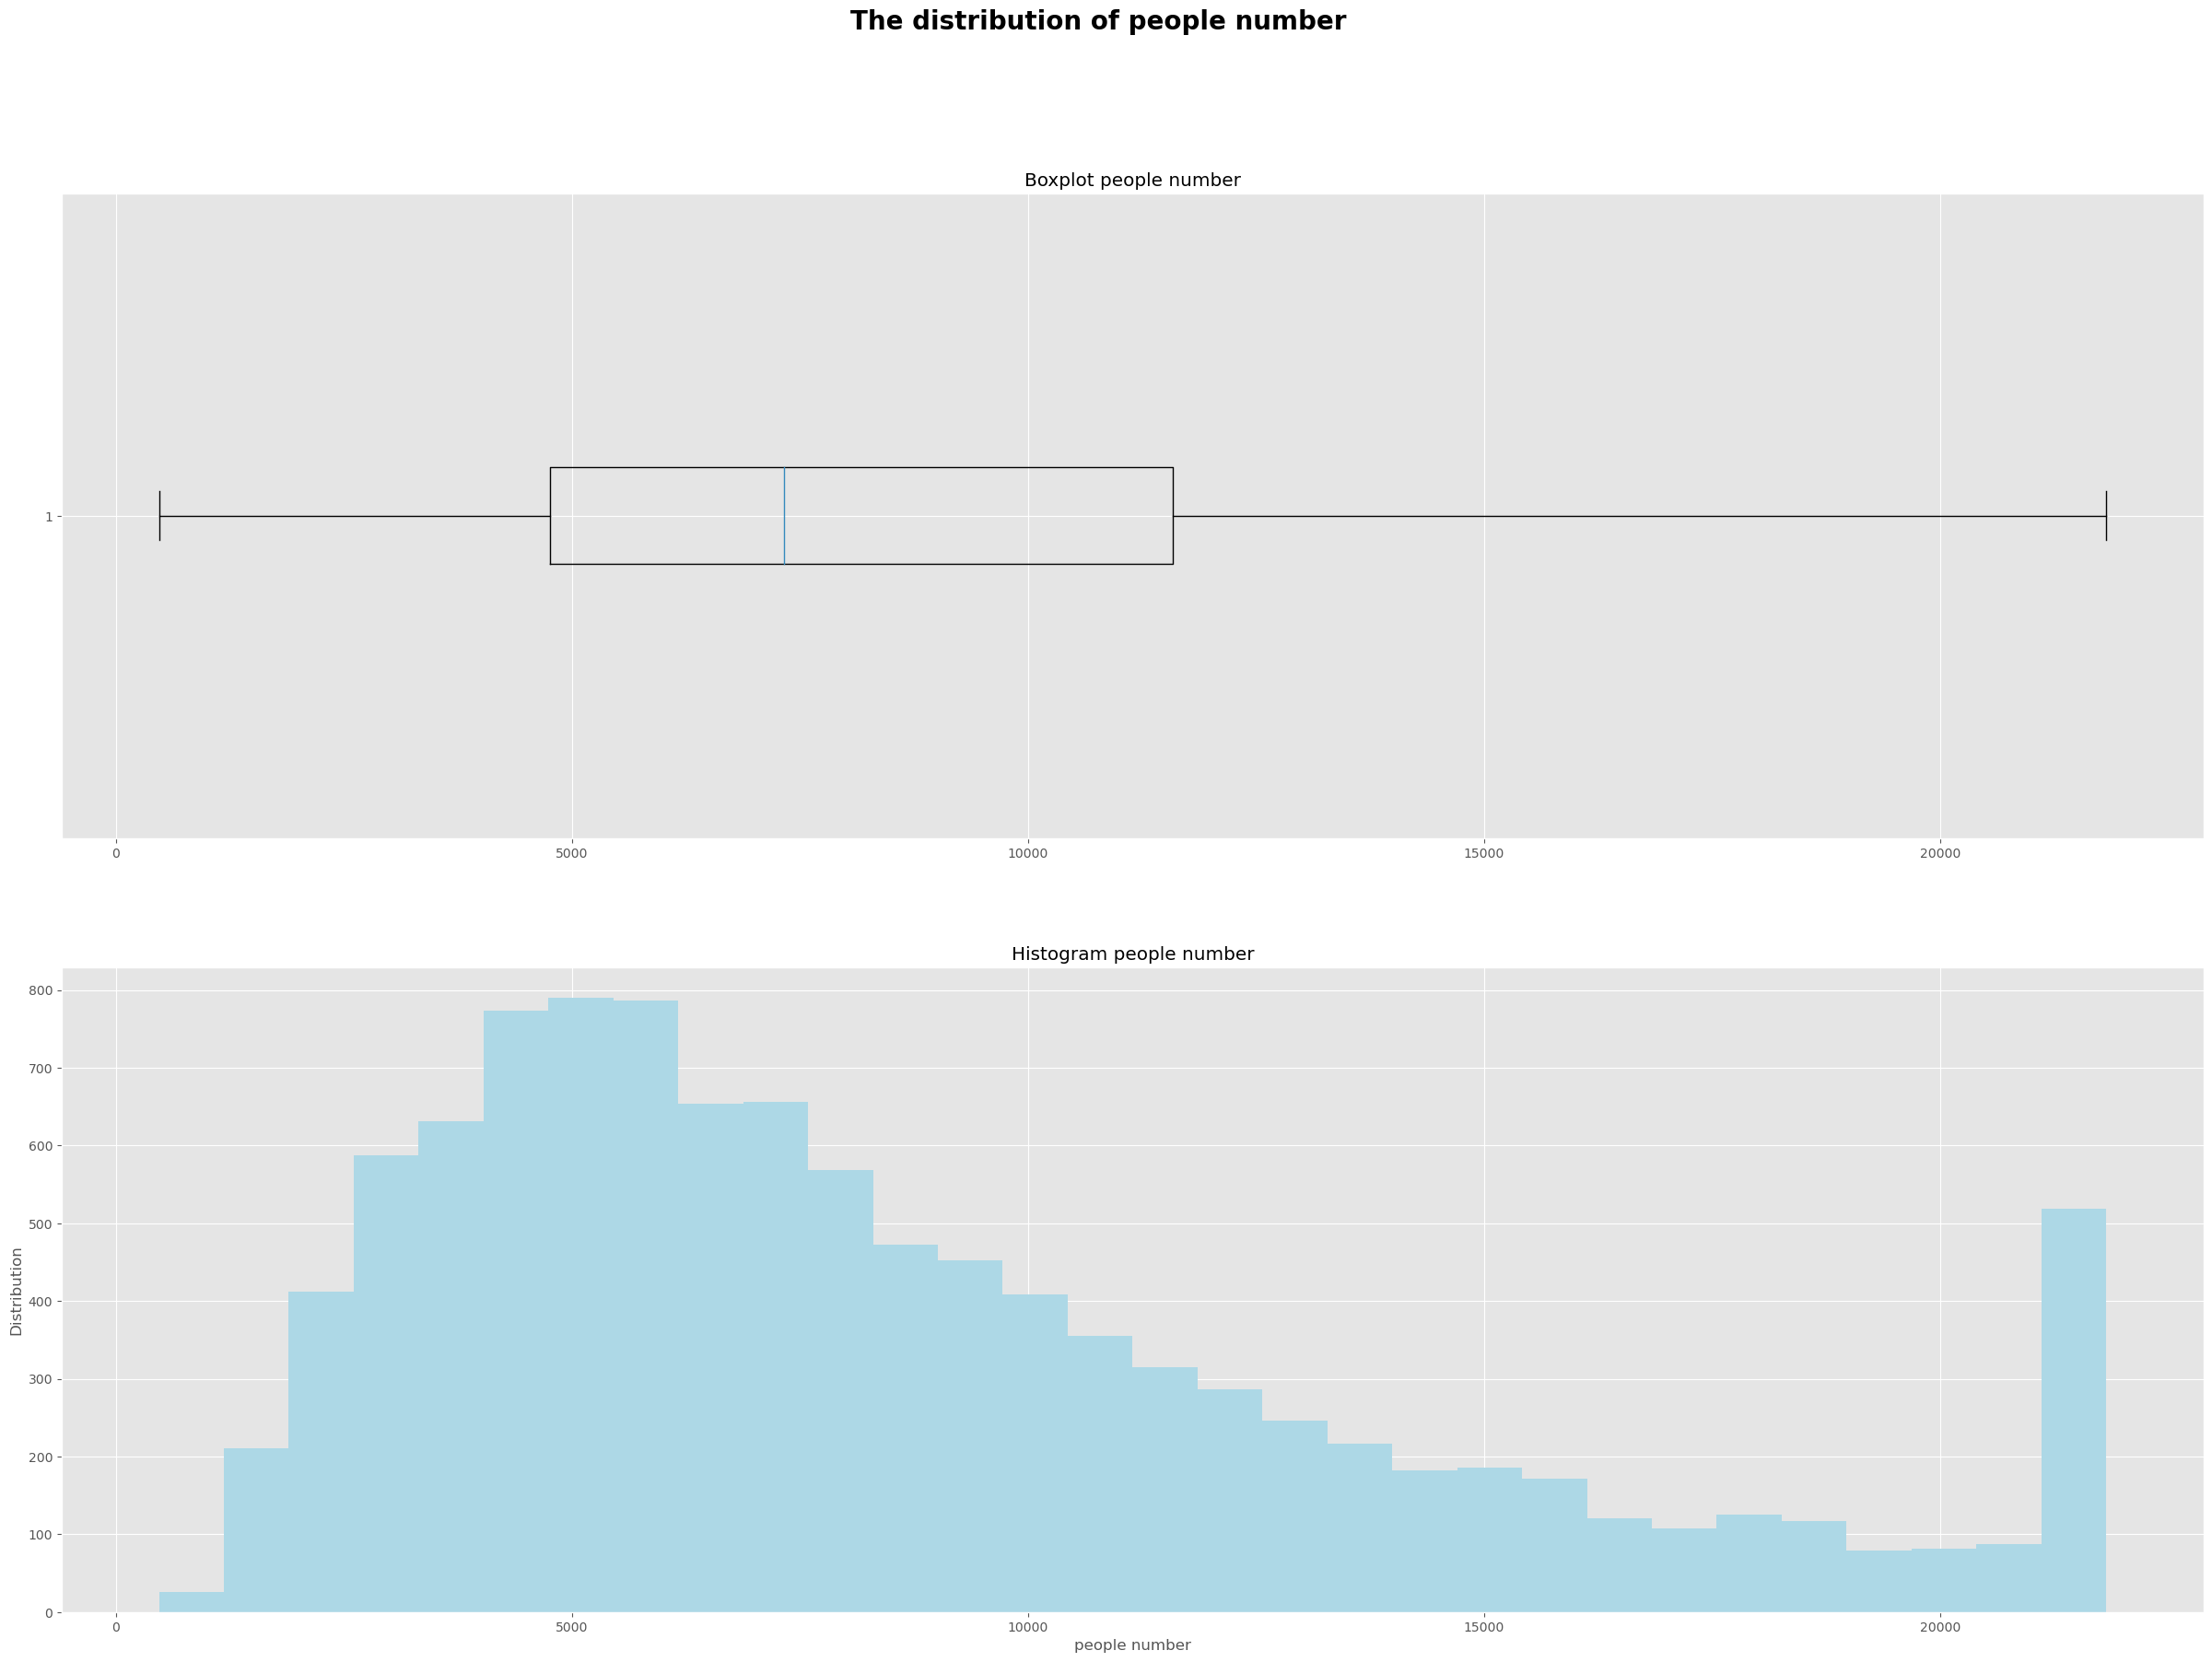

In [20]:
visualizeDistribution(df_replaced_iqr_outliers, "people_number", "people number")

<h4><font color=mediumvioletred>Replace boundary layer height outliers </font></h4>

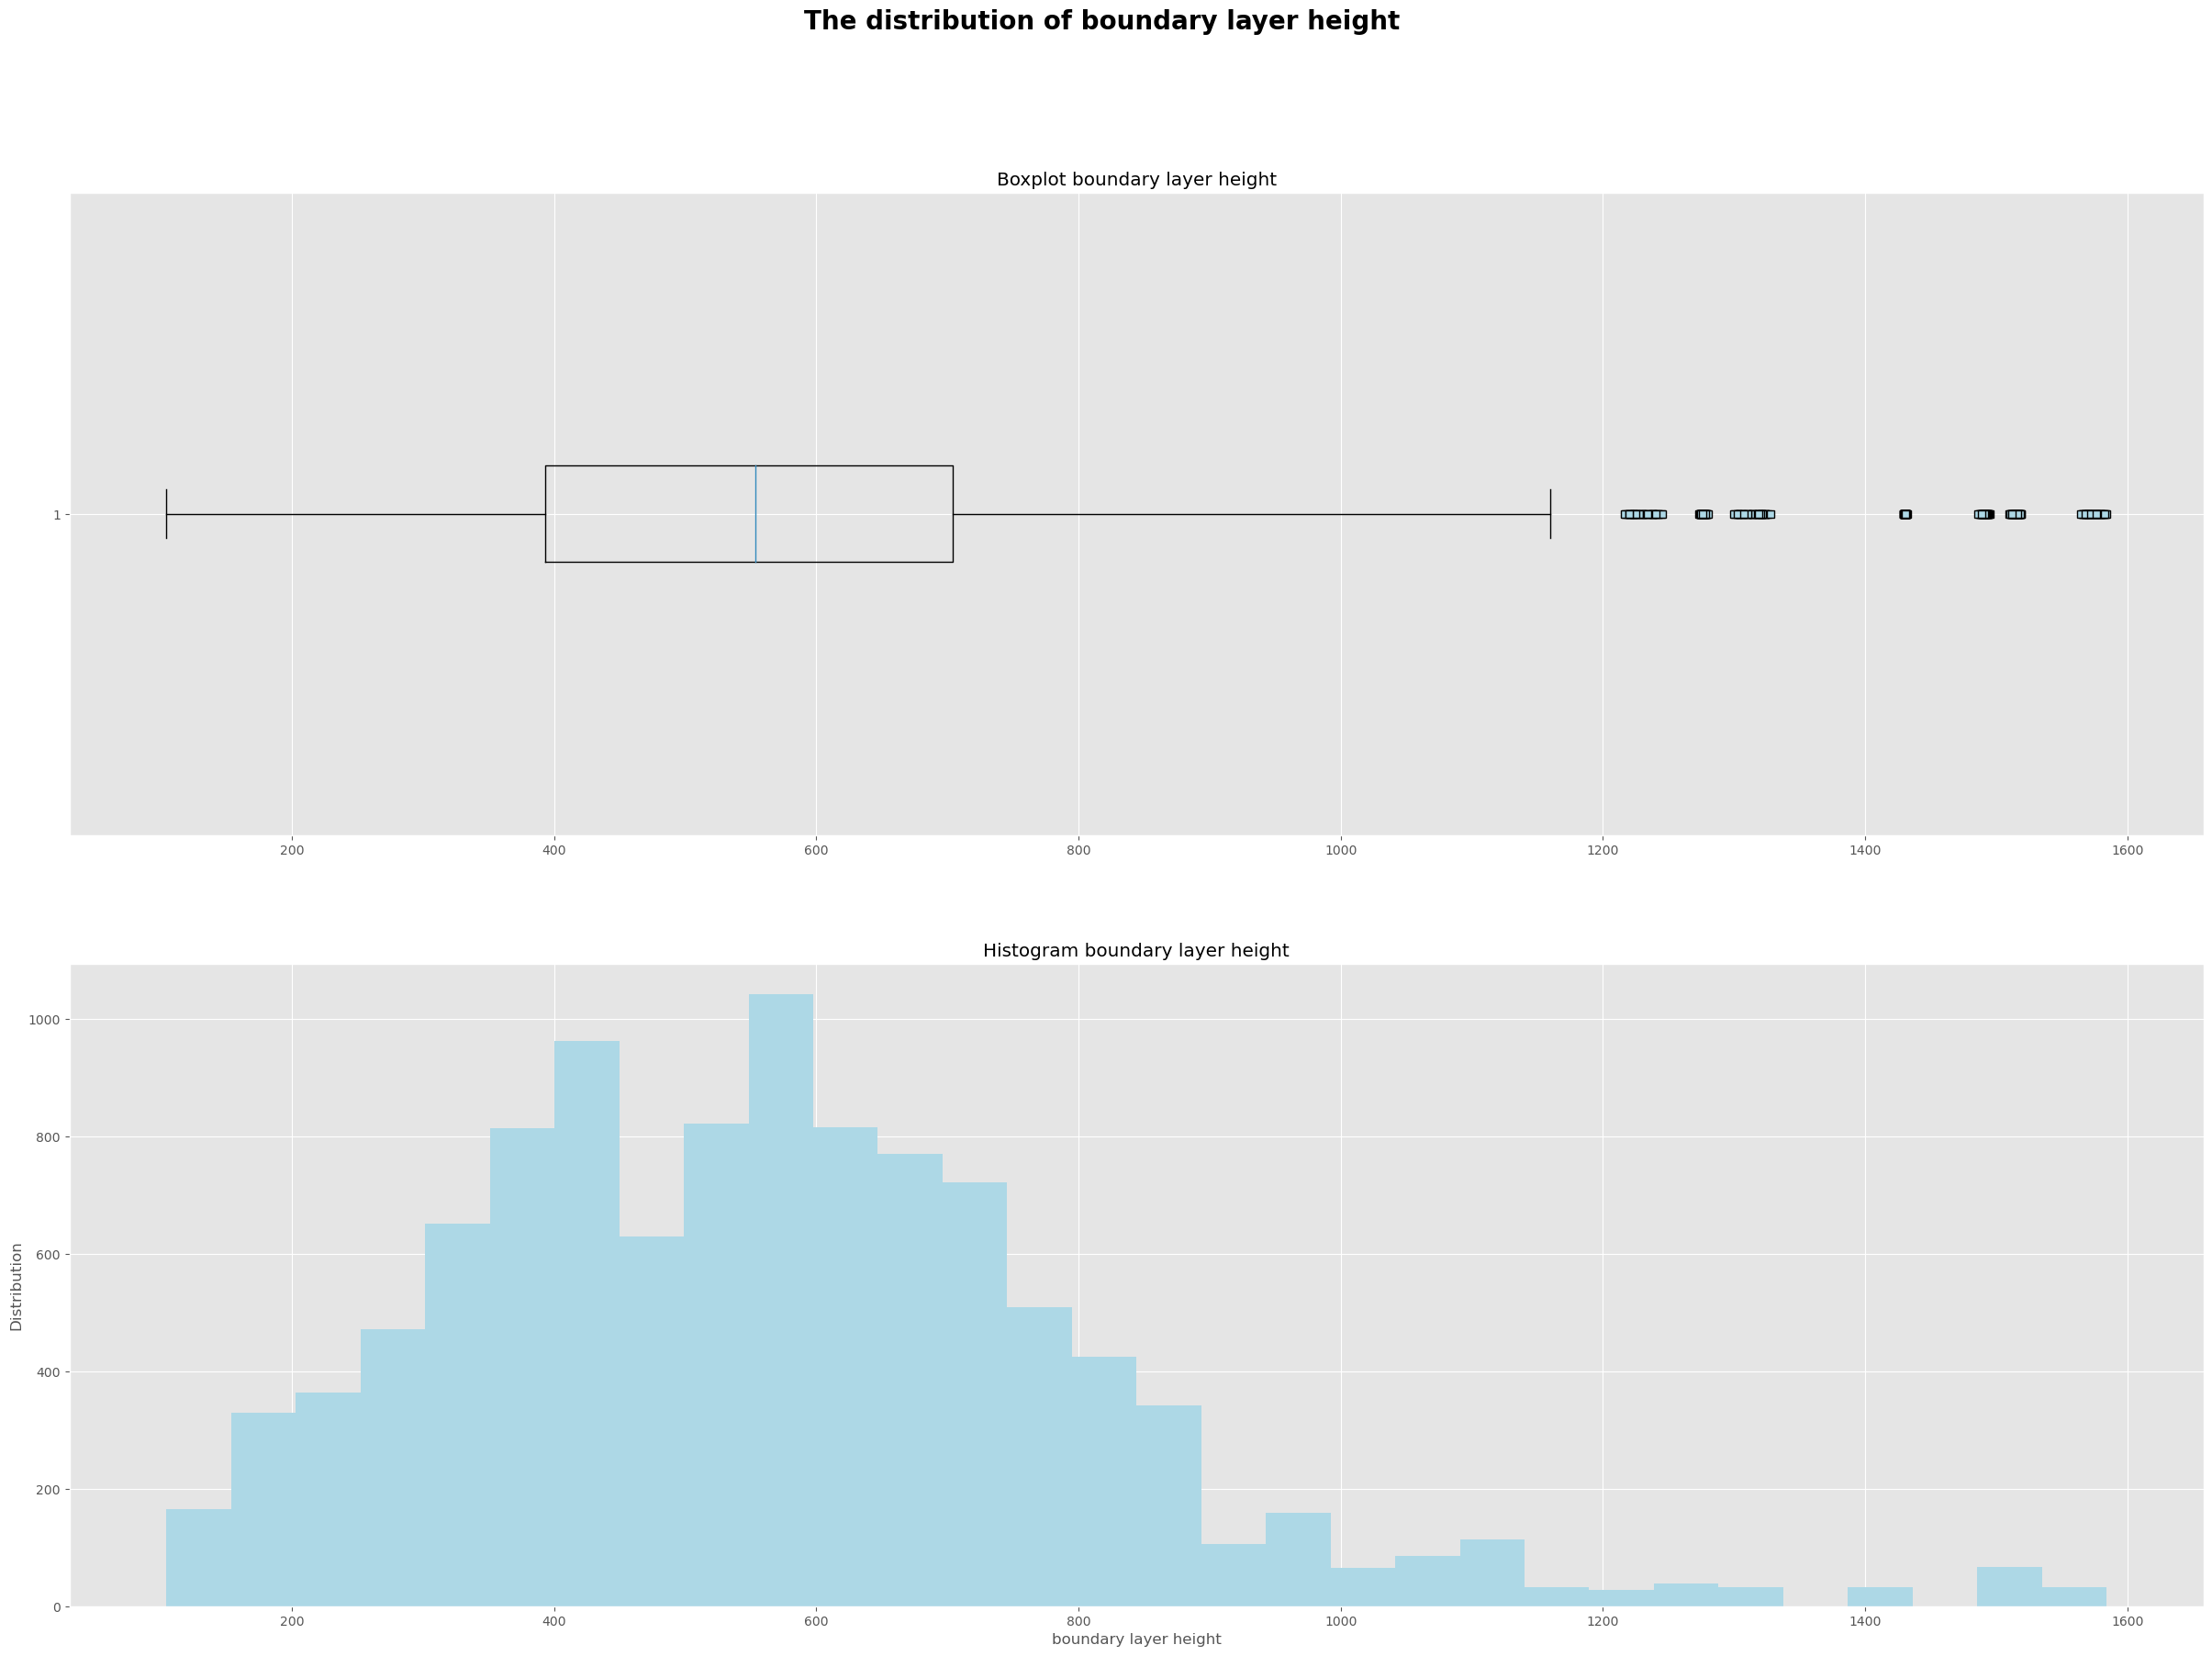

In [21]:
visualizeDistribution(df, "blh", "boundary layer height")

In [22]:
replace_outliers_iqr(df_replaced_iqr_outliers, "blh")

<h4><font color=mediumvioletred>Check boundary layer height distribution in df_replaced_iqr_outliers</font></h4>

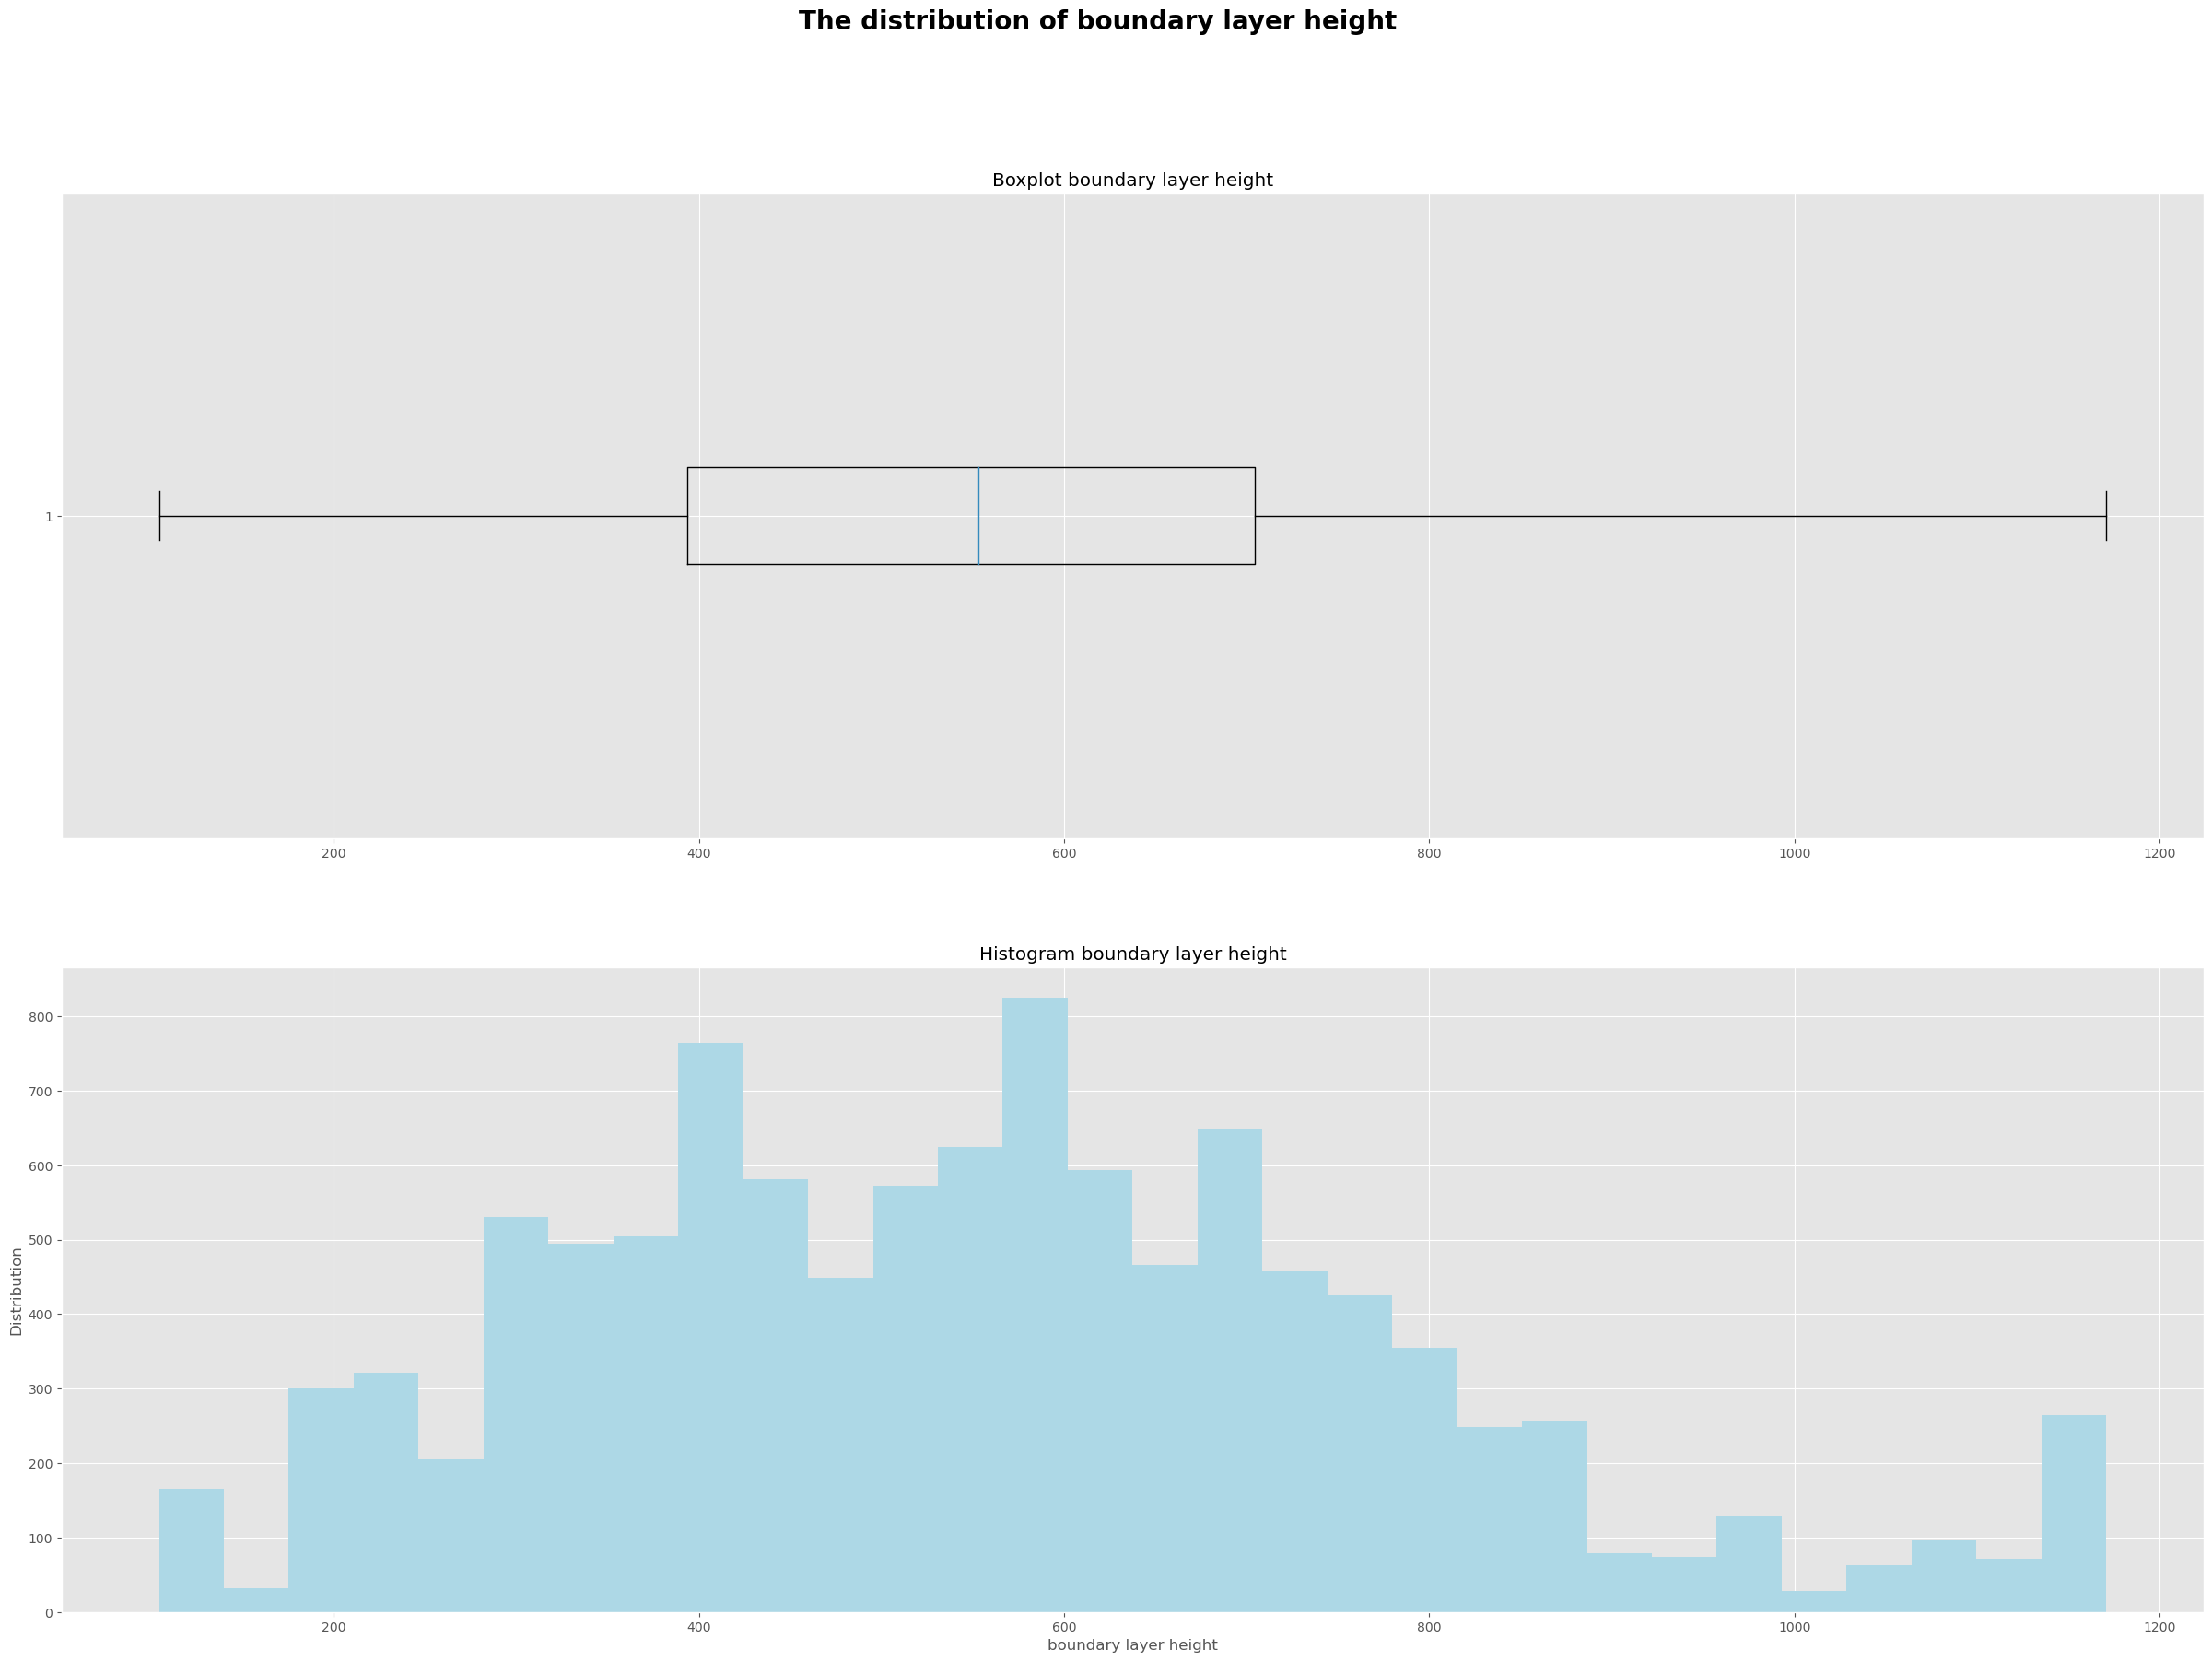

In [23]:
visualizeDistribution(df_replaced_iqr_outliers, "blh", "boundary layer height")

<h4><font color=mediumvioletred>Replace wind speed outliers </font></h4>

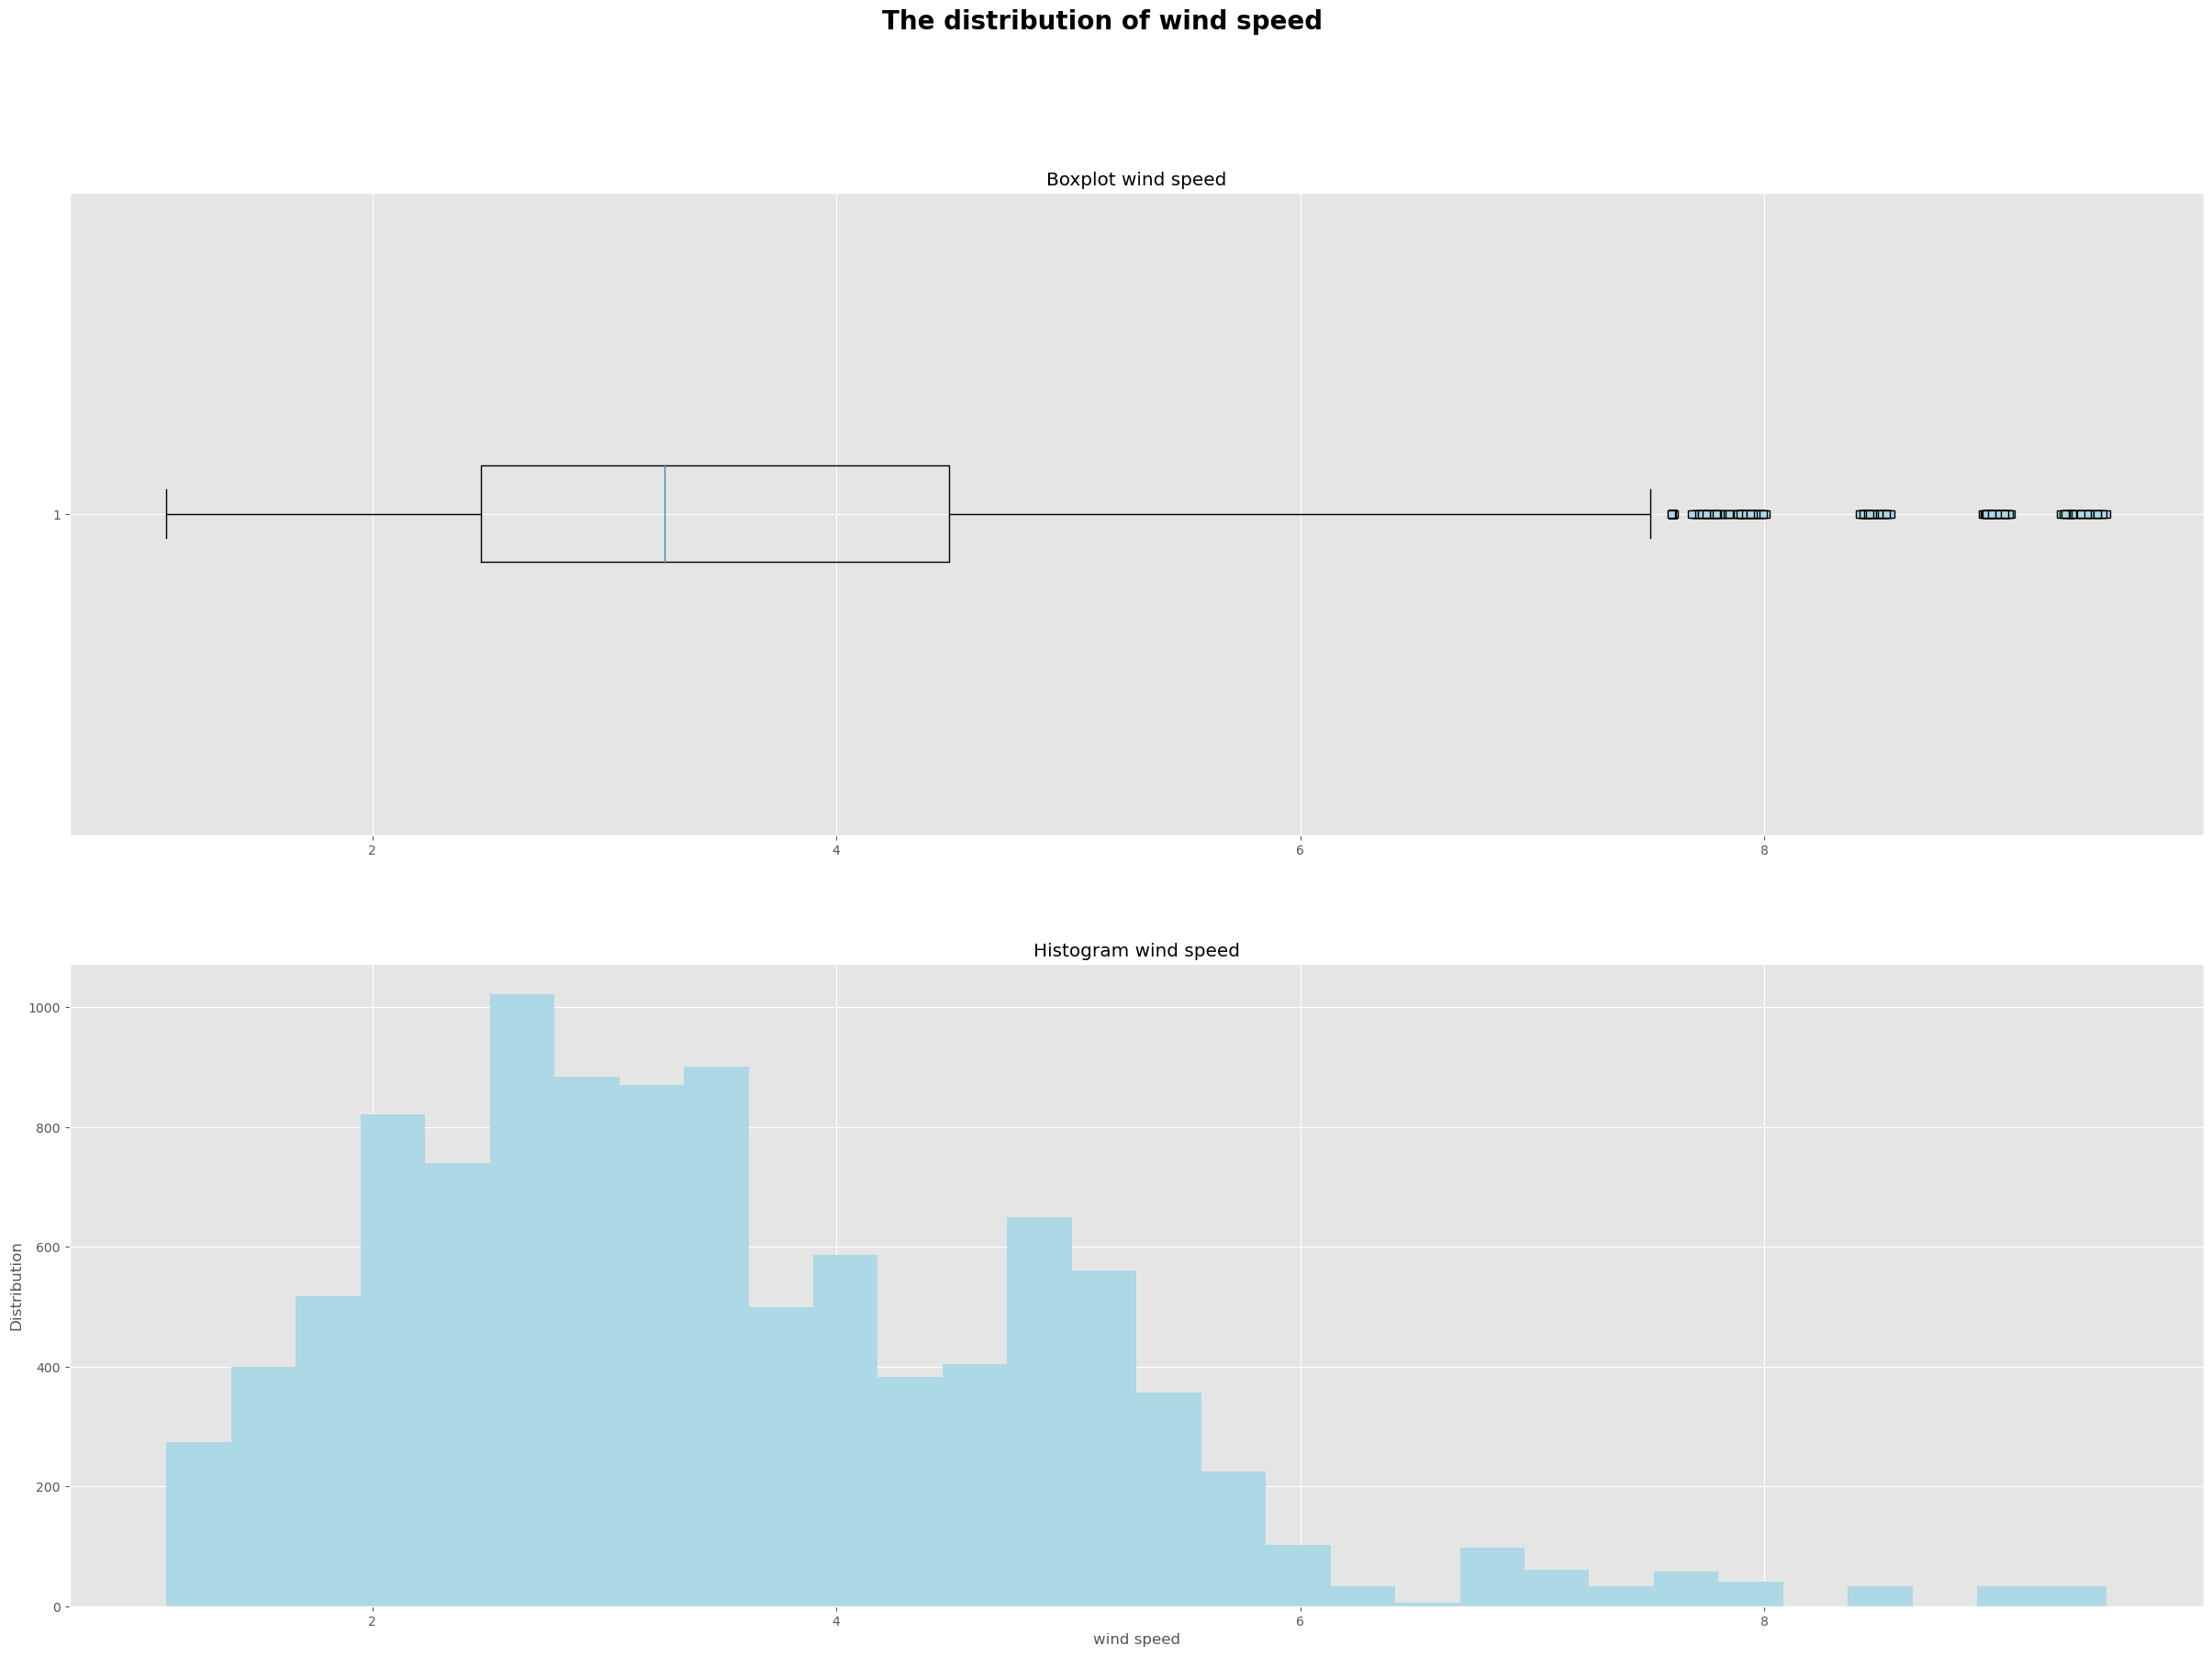

In [24]:
visualizeDistribution(df, "ws", "wind speed")

In [25]:
replace_outliers_iqr(df_replaced_iqr_outliers, "ws")

<h4><font color=mediumvioletred>Check wind speed distribution in df_replaced_iqr_outliers</font></h4>

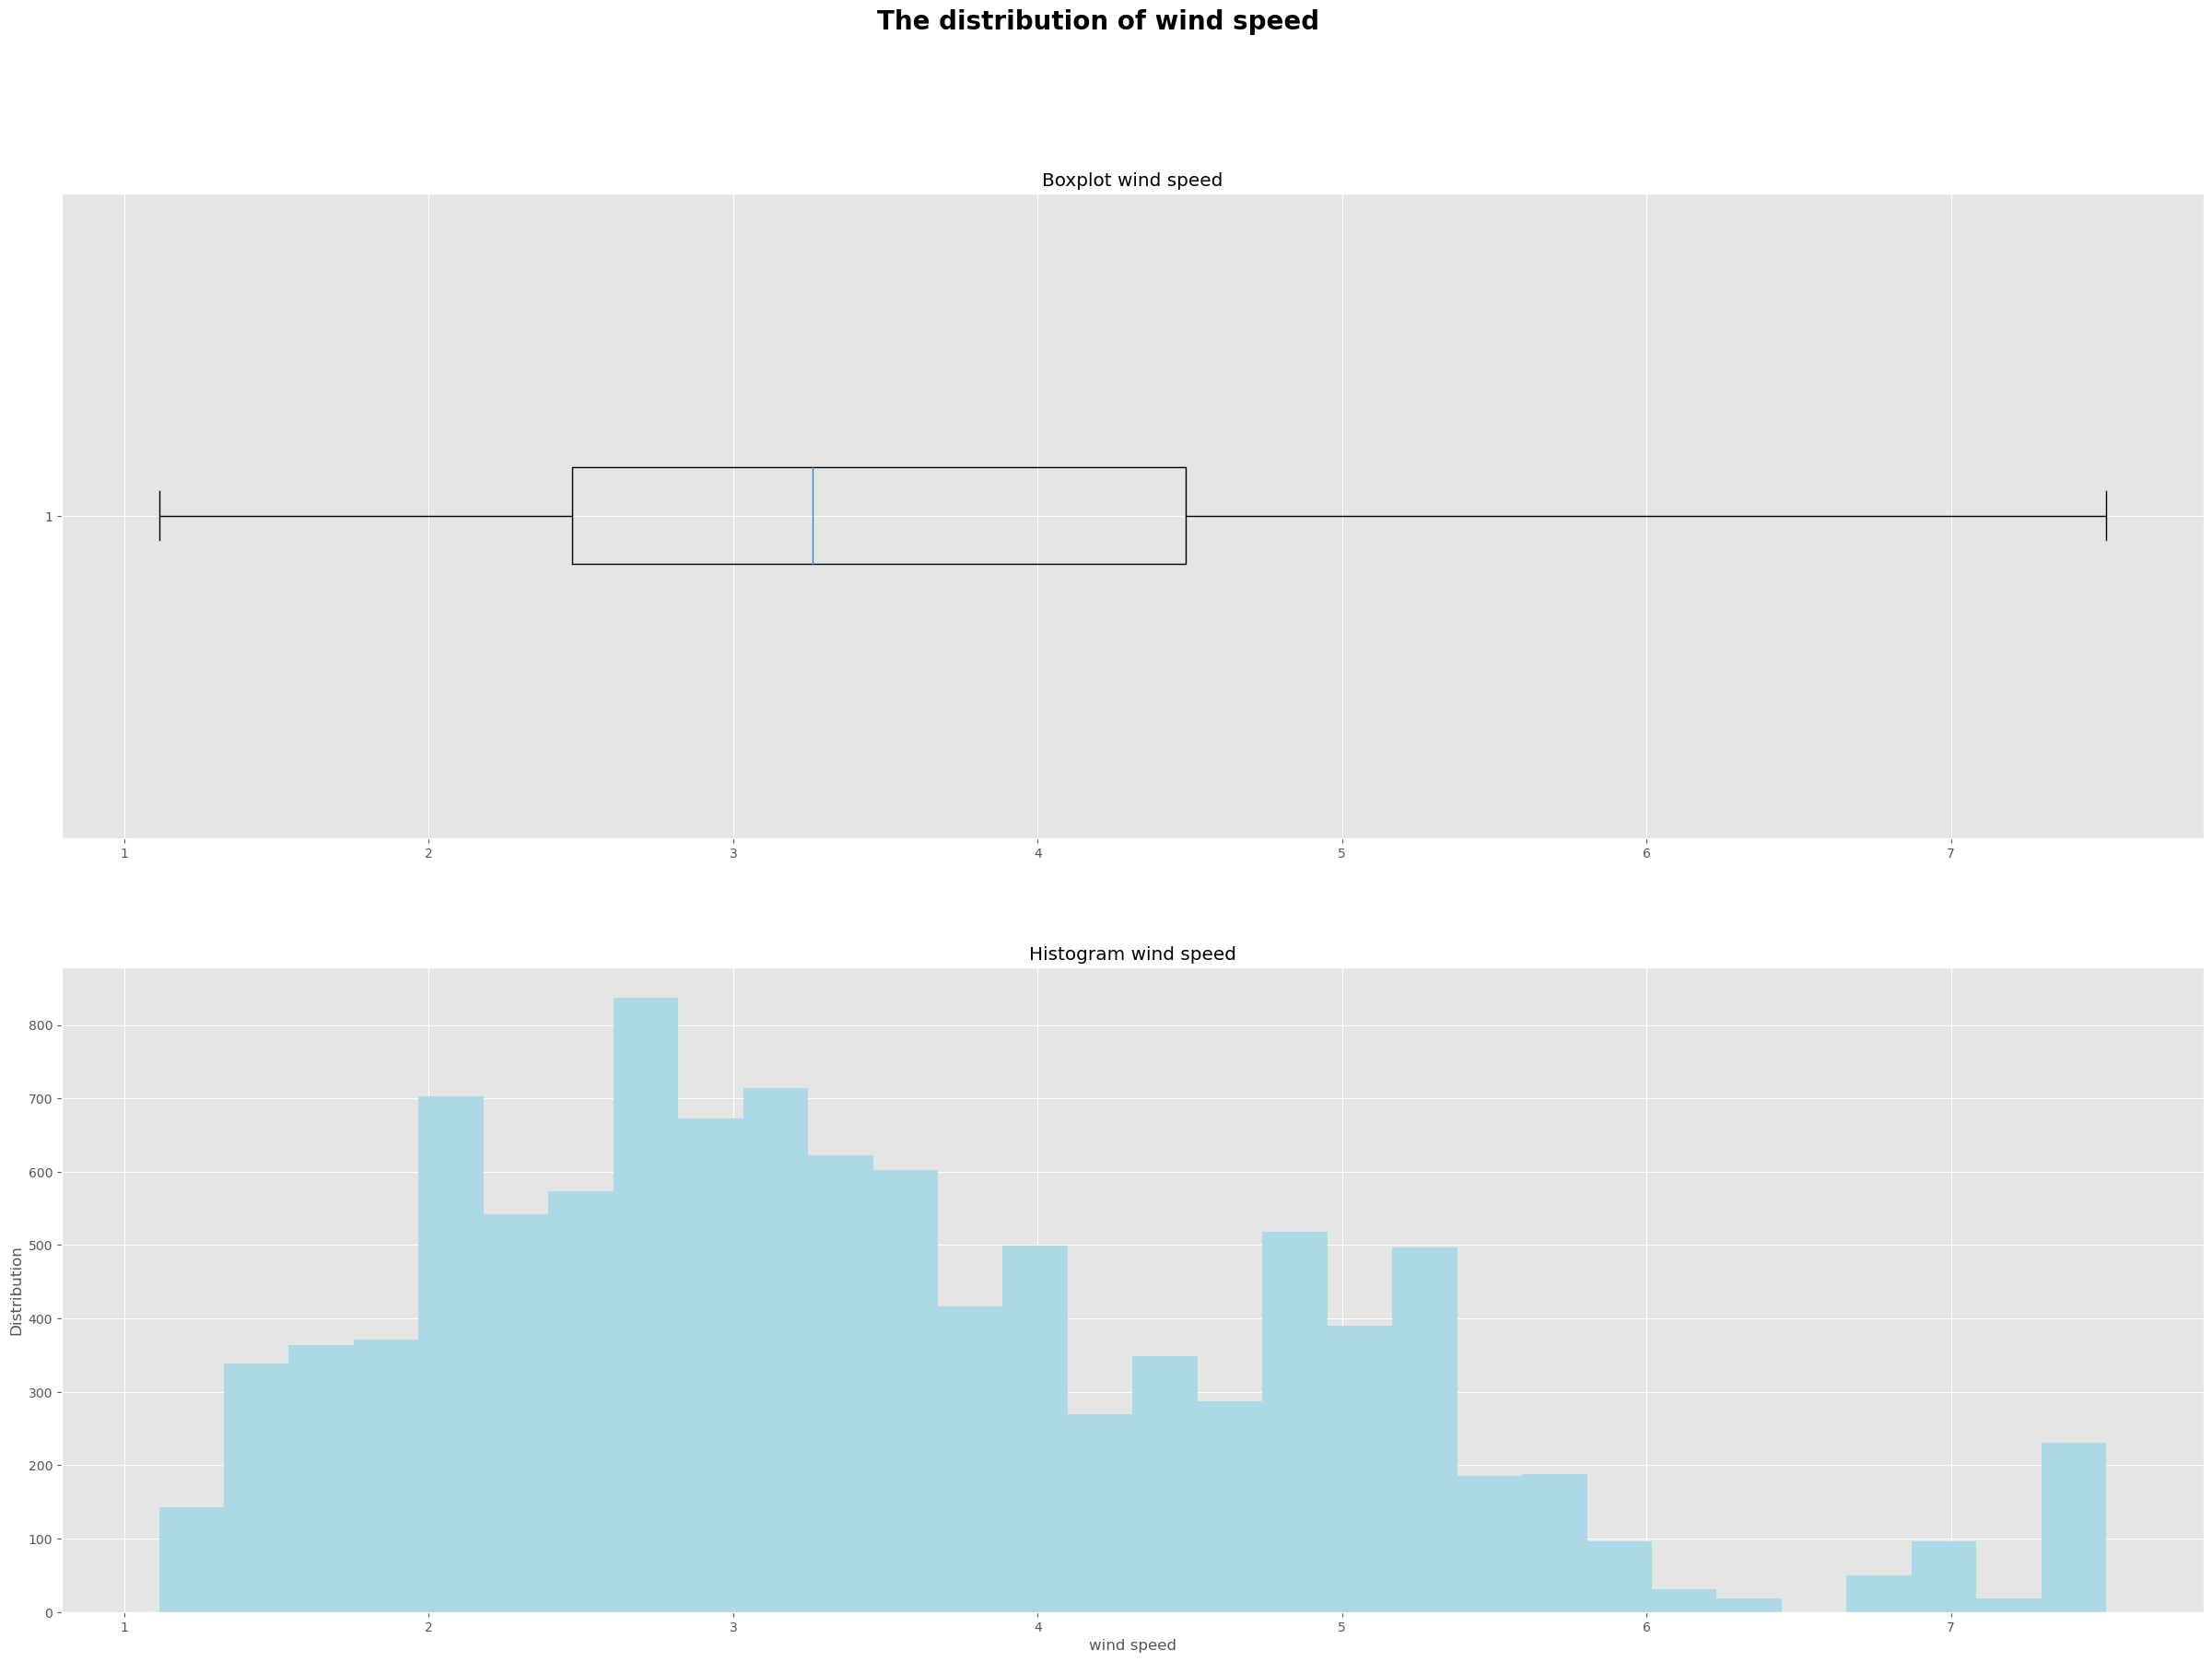

In [26]:
visualizeDistribution(df_replaced_iqr_outliers, "ws", "wind speed")

<h4><font color=mediumvioletred>Export df_replaced_iqr_outliers to csv</font></h4>

In [27]:
df_replaced_iqr_outliers.to_csv("data/df_replaced_iqr_outliers.csv", index=False)

<h3><font color=steelblue>Replace pm2.5, people number, boundary layer height and wind speed outliers with Interquartile Range (IQR) in weekly dataframe</font></h3>

Resource: https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893

<h4><font color=mediumvioletred>Create a copy of the dataframe </font></h4>

In [28]:
df_replaced_iqr_outliers_weekly = df_weekly.copy()

<h4><font color=mediumvioletred>Replace pm2.5 outliers </font></h4>

In [29]:
replace_outliers_iqr(df_replaced_iqr_outliers_weekly, "pm2.5")

<h4><font color=mediumvioletred>Check pollution distribution in df_replaced_iqr_outliers_weekly</font></h4>

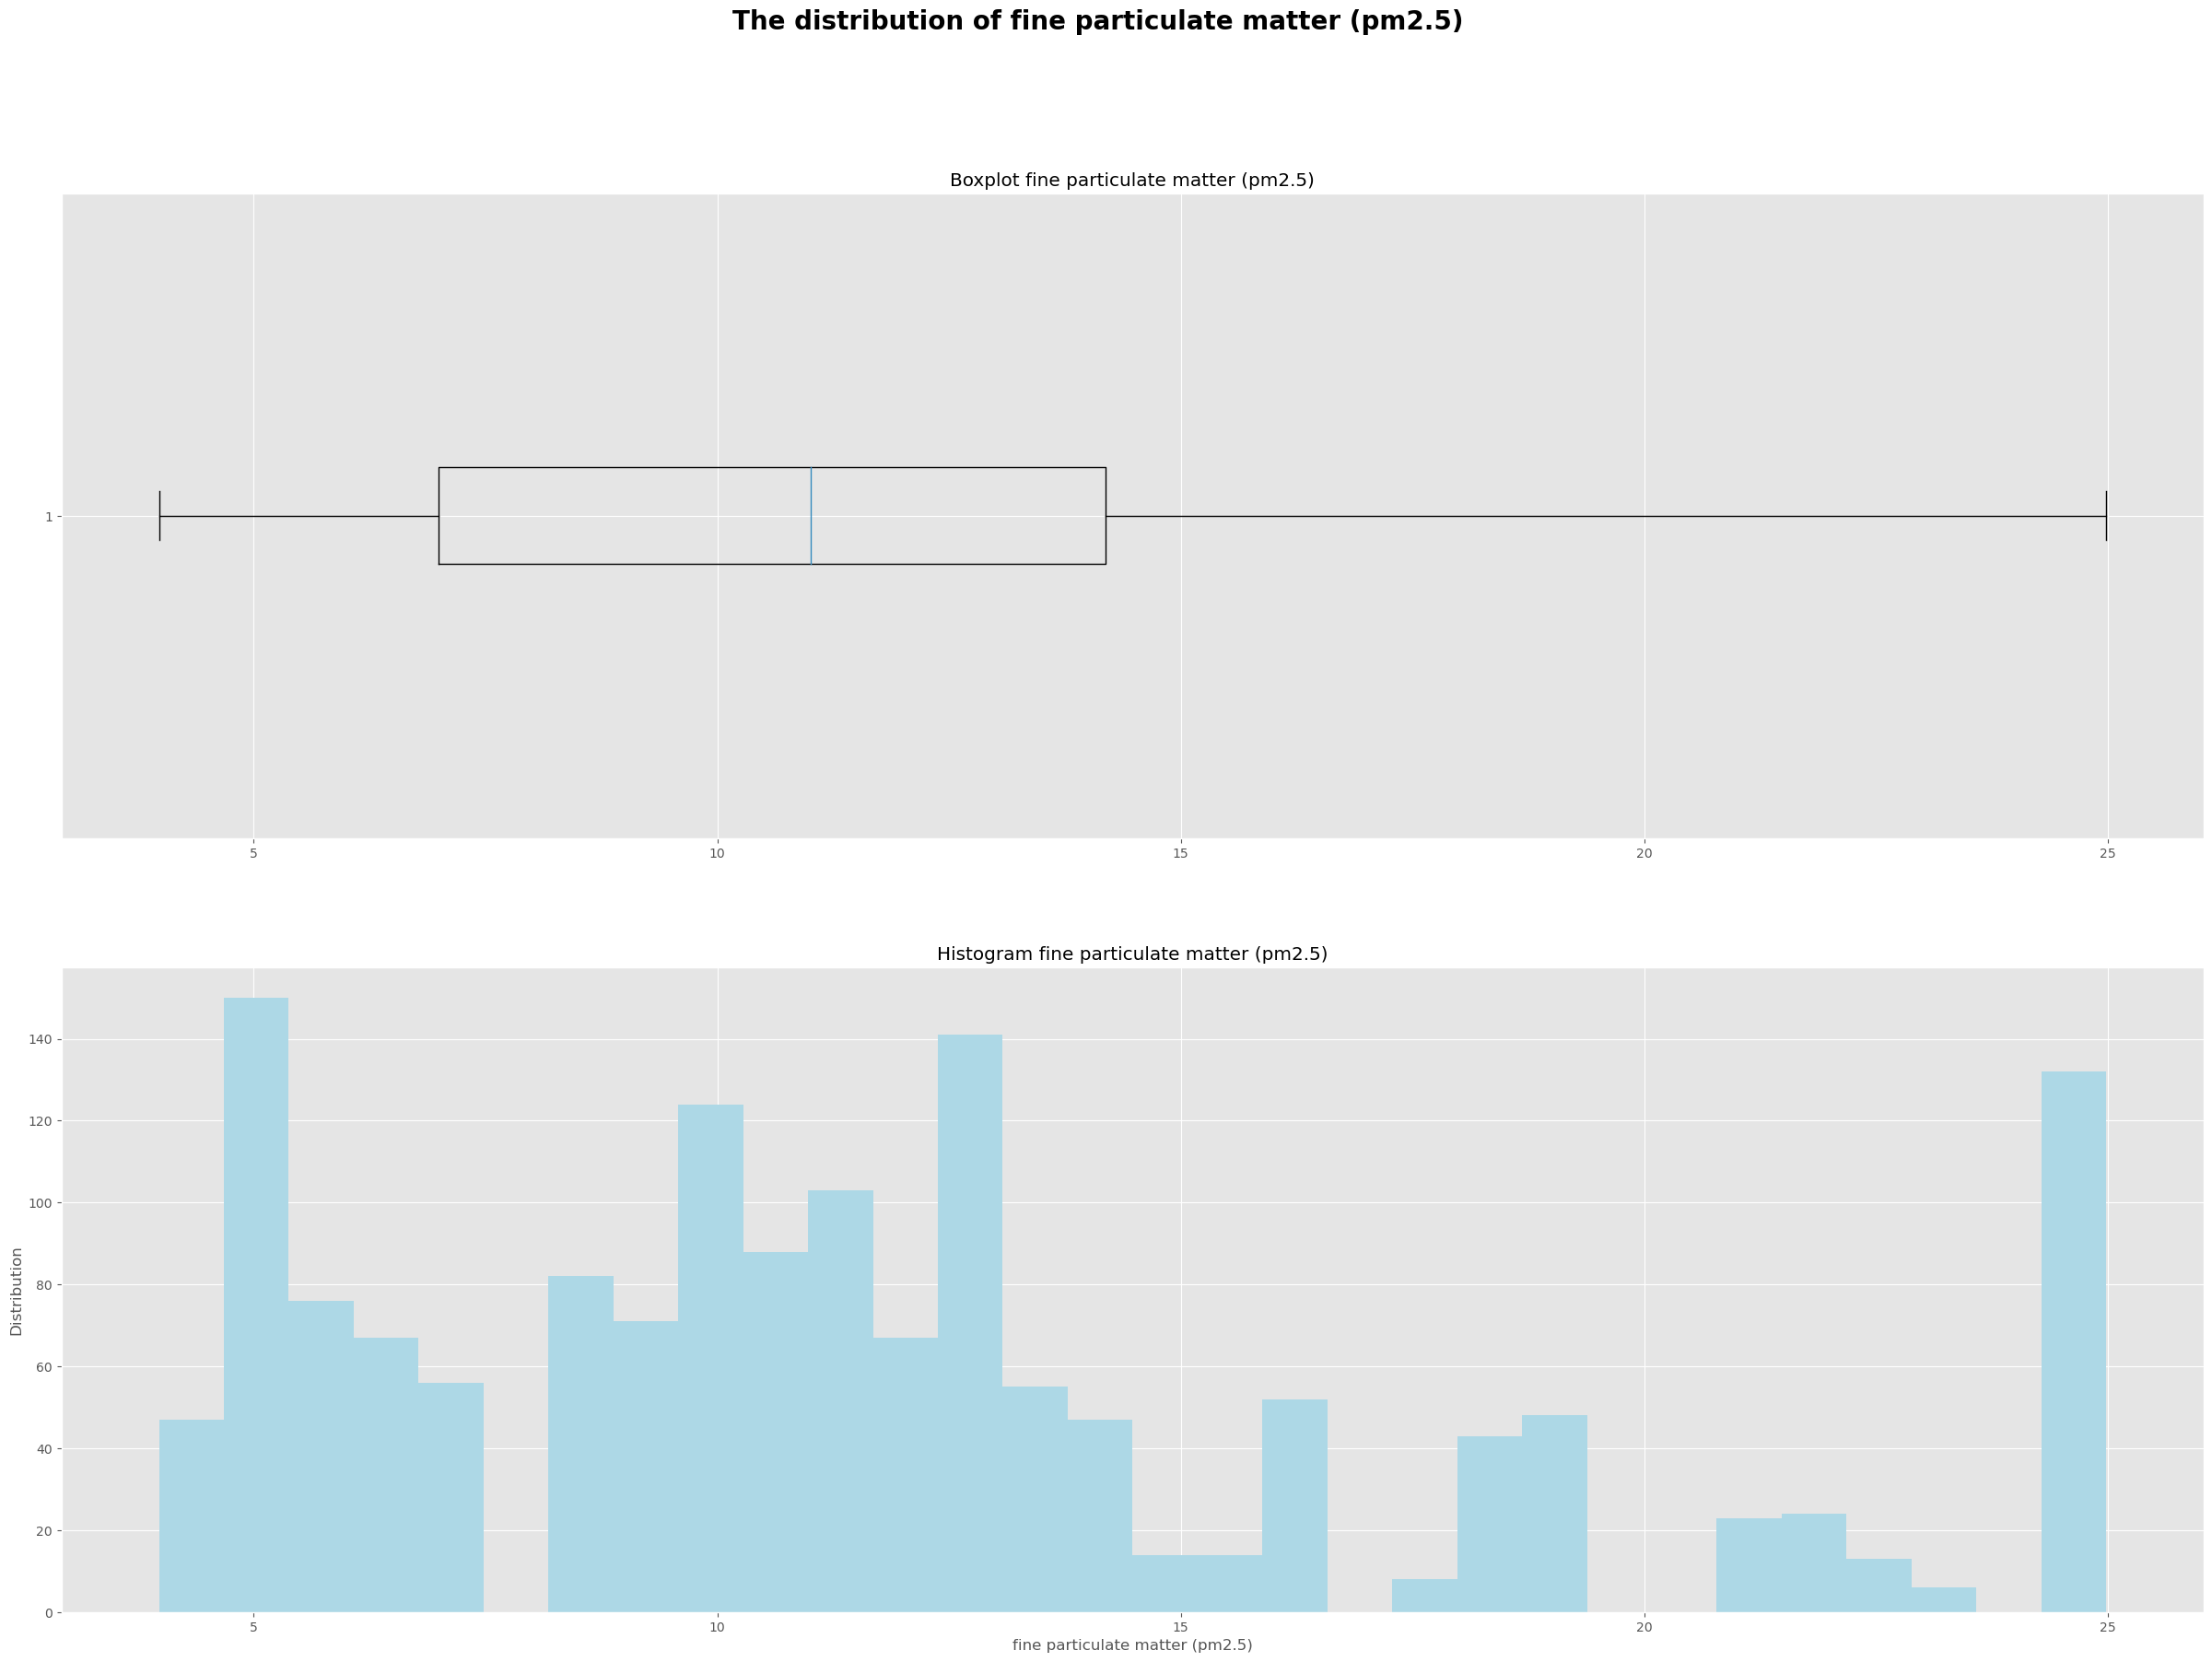

In [30]:
visualizeDistribution(df_replaced_iqr_outliers_weekly, "pm2.5", "fine particulate matter (pm2.5)")

<h4><font color=mediumvioletred>Replace people number outliers </font></h4>

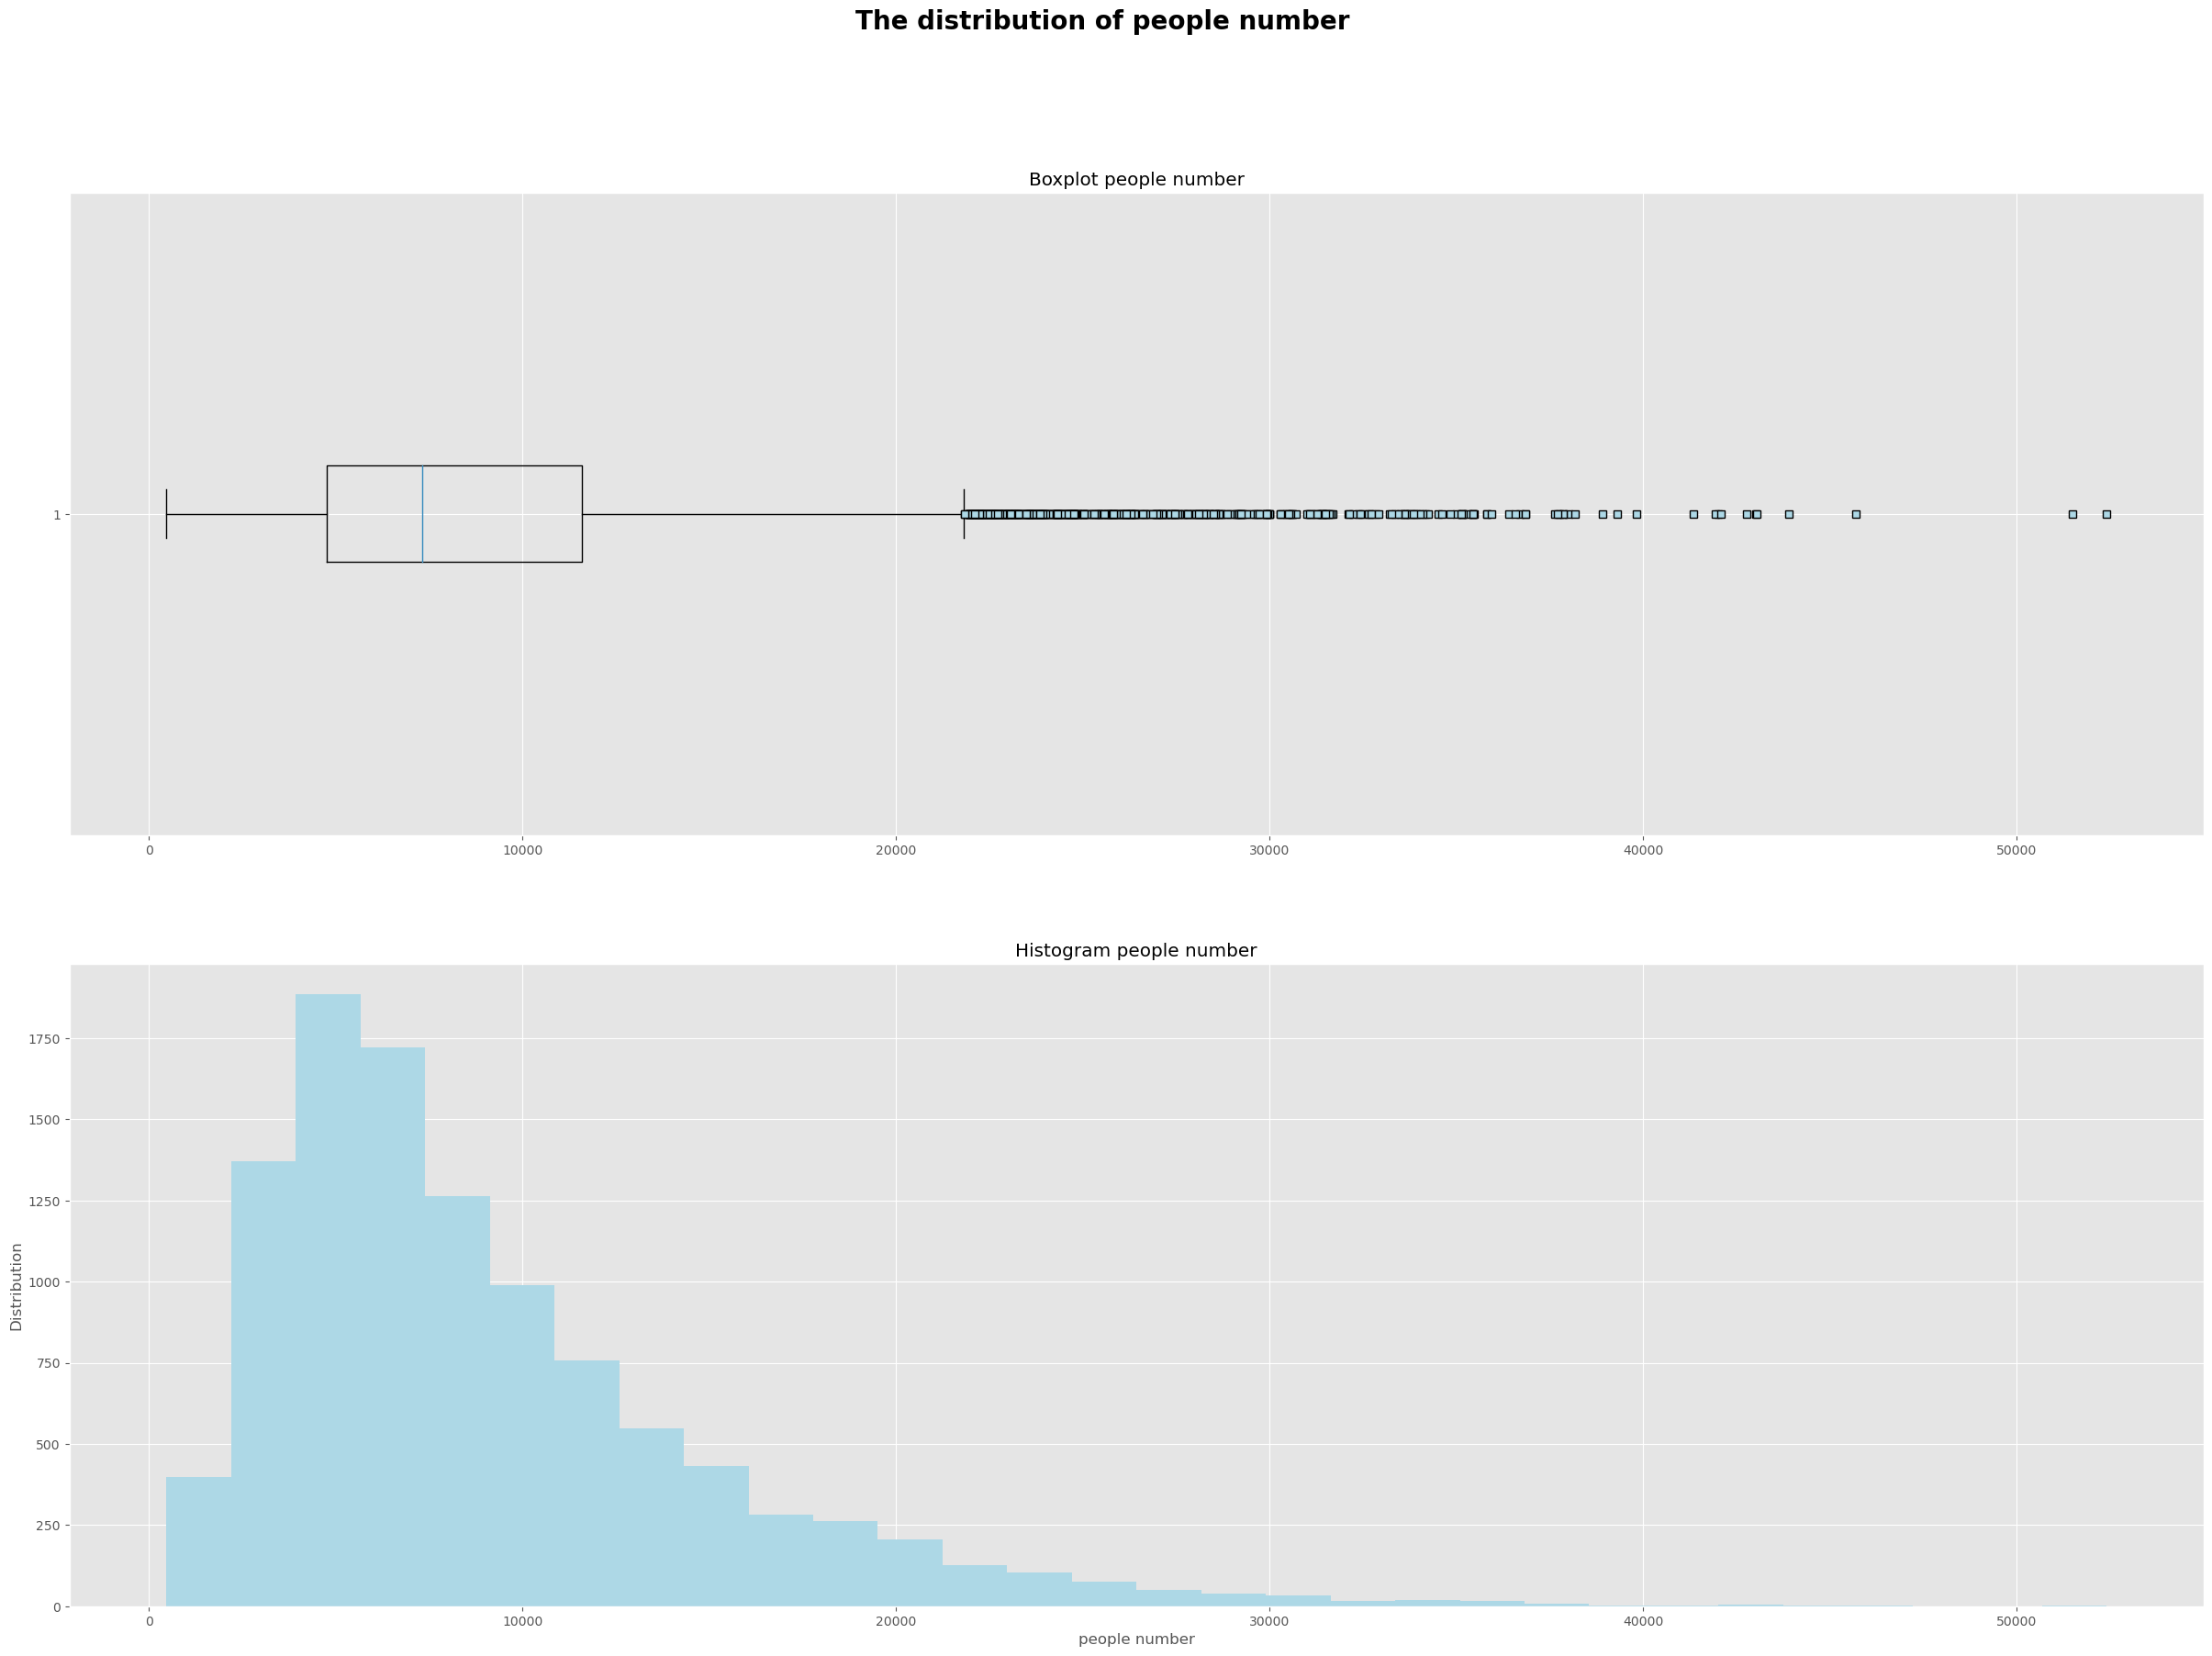

In [31]:
visualizeDistribution(df, "people_number", "people number")

In [32]:
replace_outliers_iqr(df_replaced_iqr_outliers_weekly, "people_number")

<h4><font color=mediumvioletred>Check people number distribution in df_replaced_iqr_outliers_weekly</font></h4>

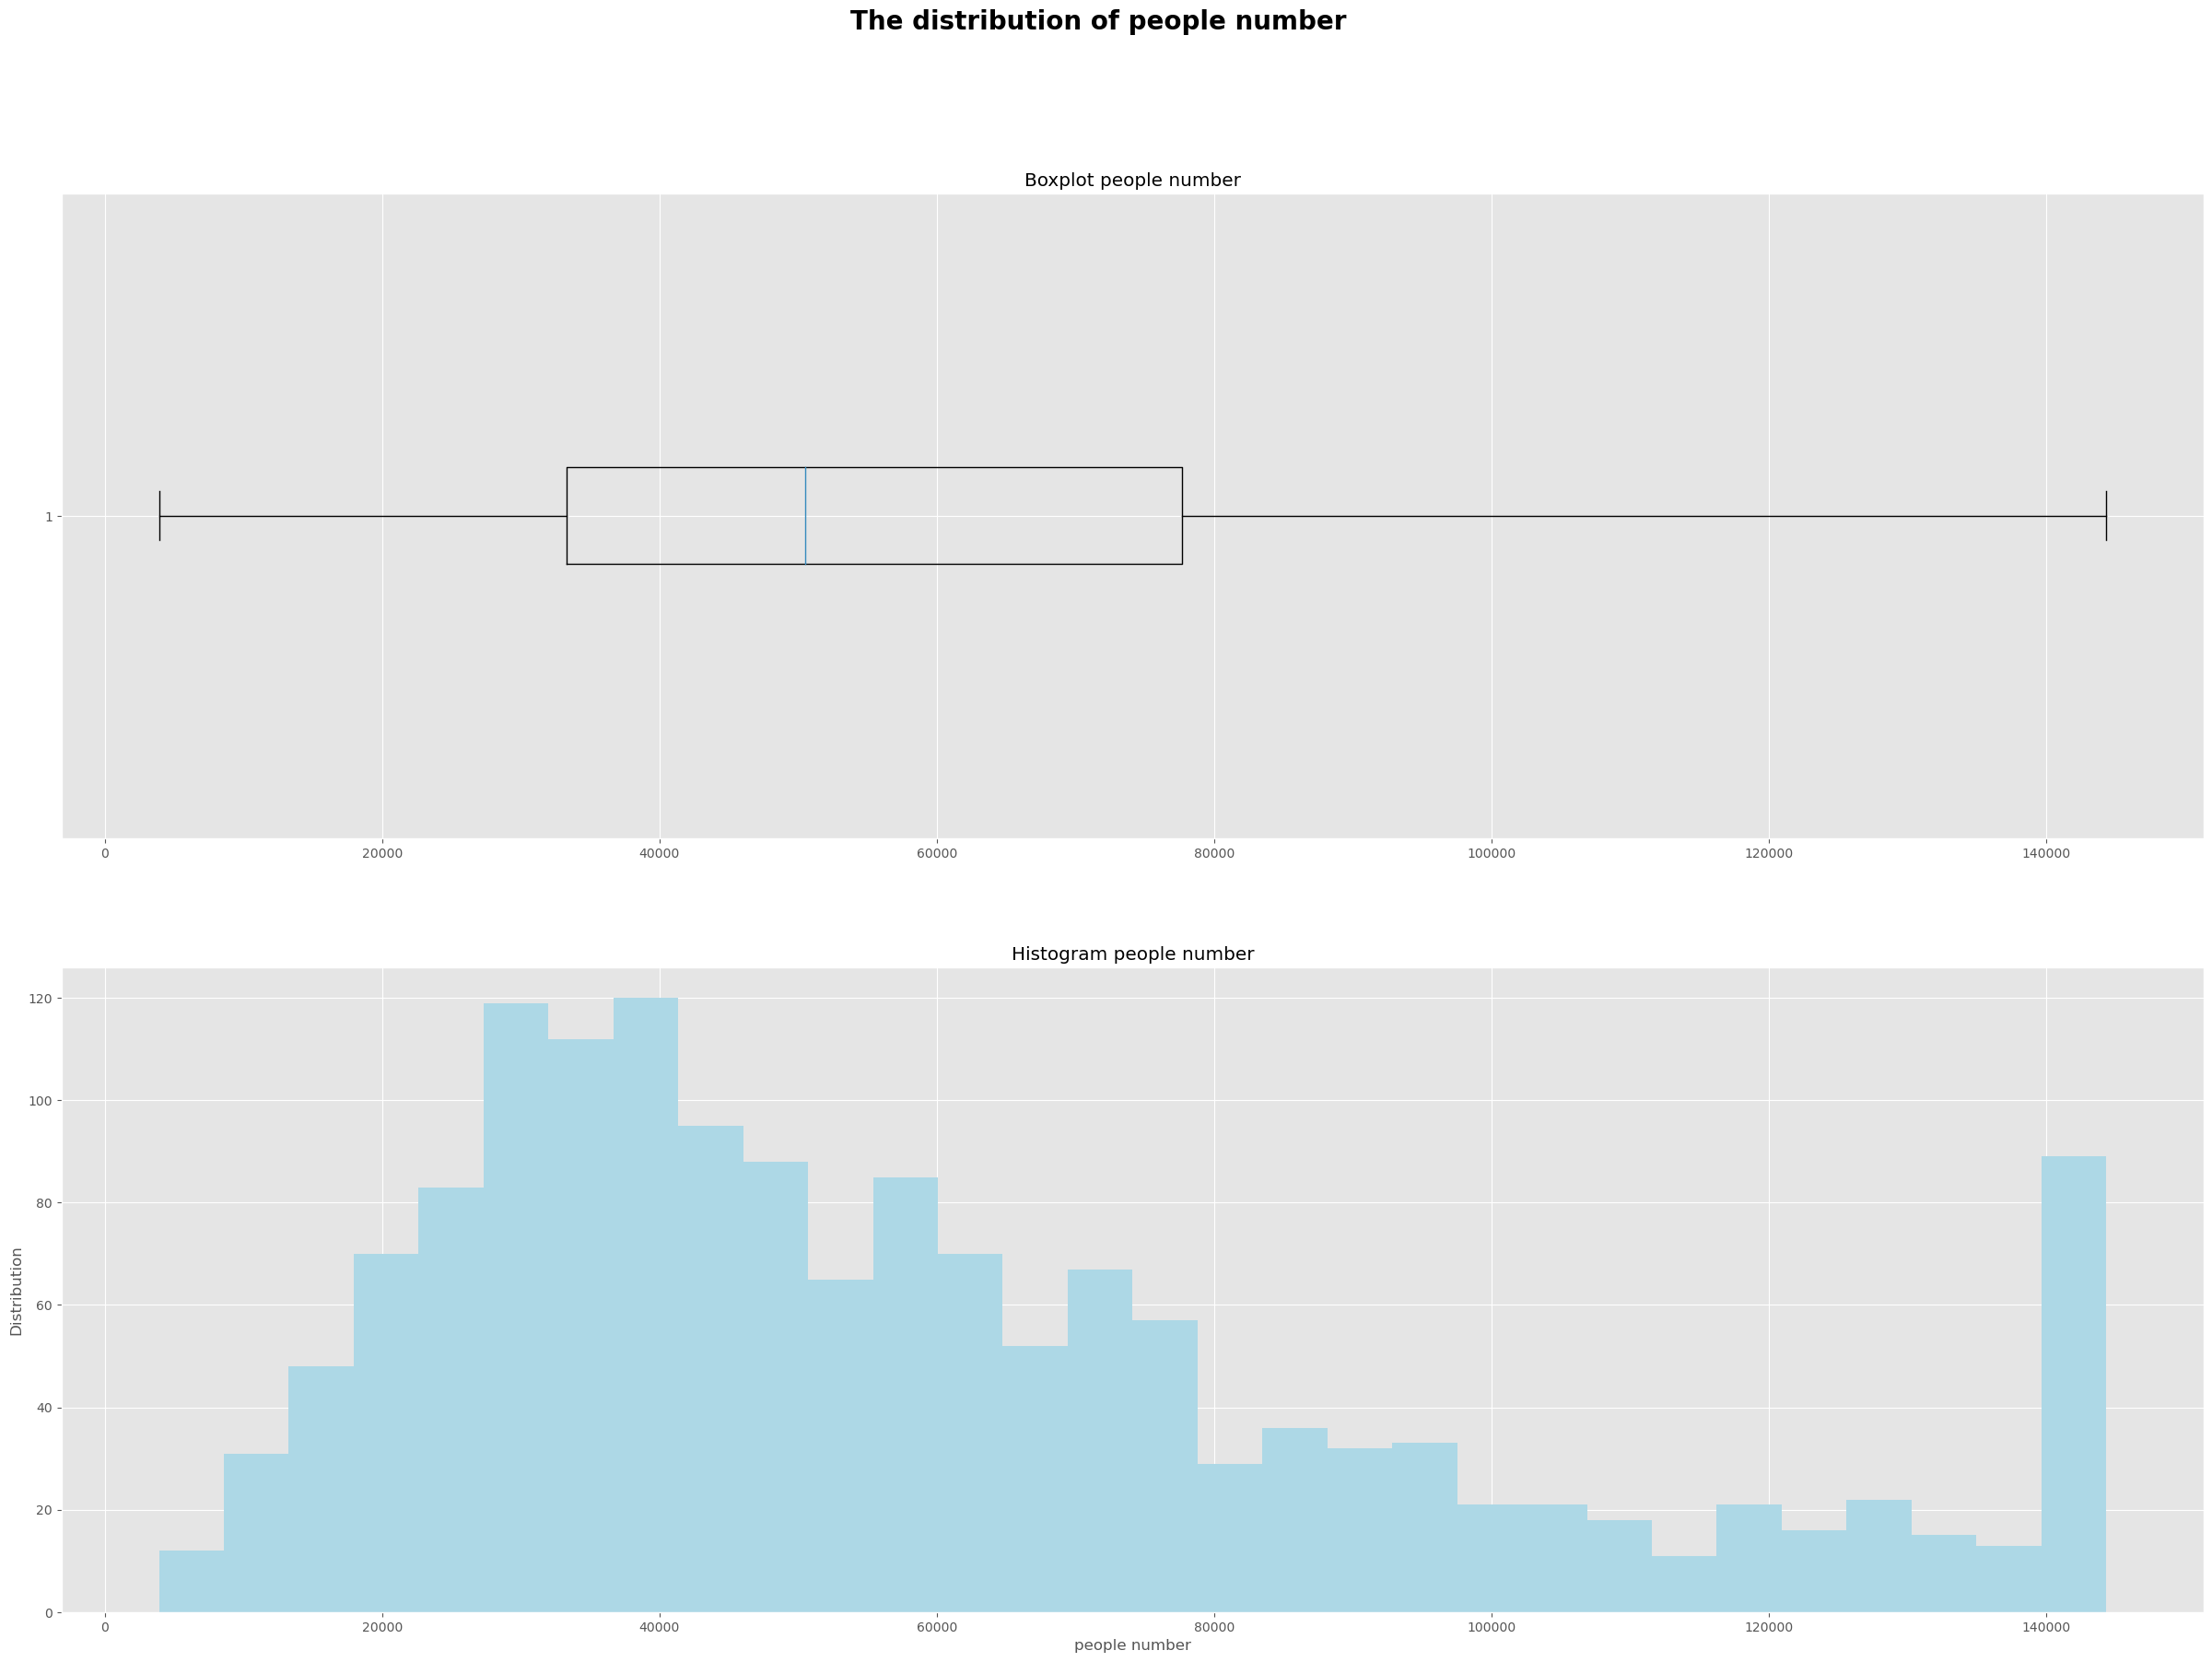

In [33]:
visualizeDistribution(df_replaced_iqr_outliers_weekly, "people_number", "people number")

<h4><font color=mediumvioletred>Replace boundary layer height outliers </font></h4>

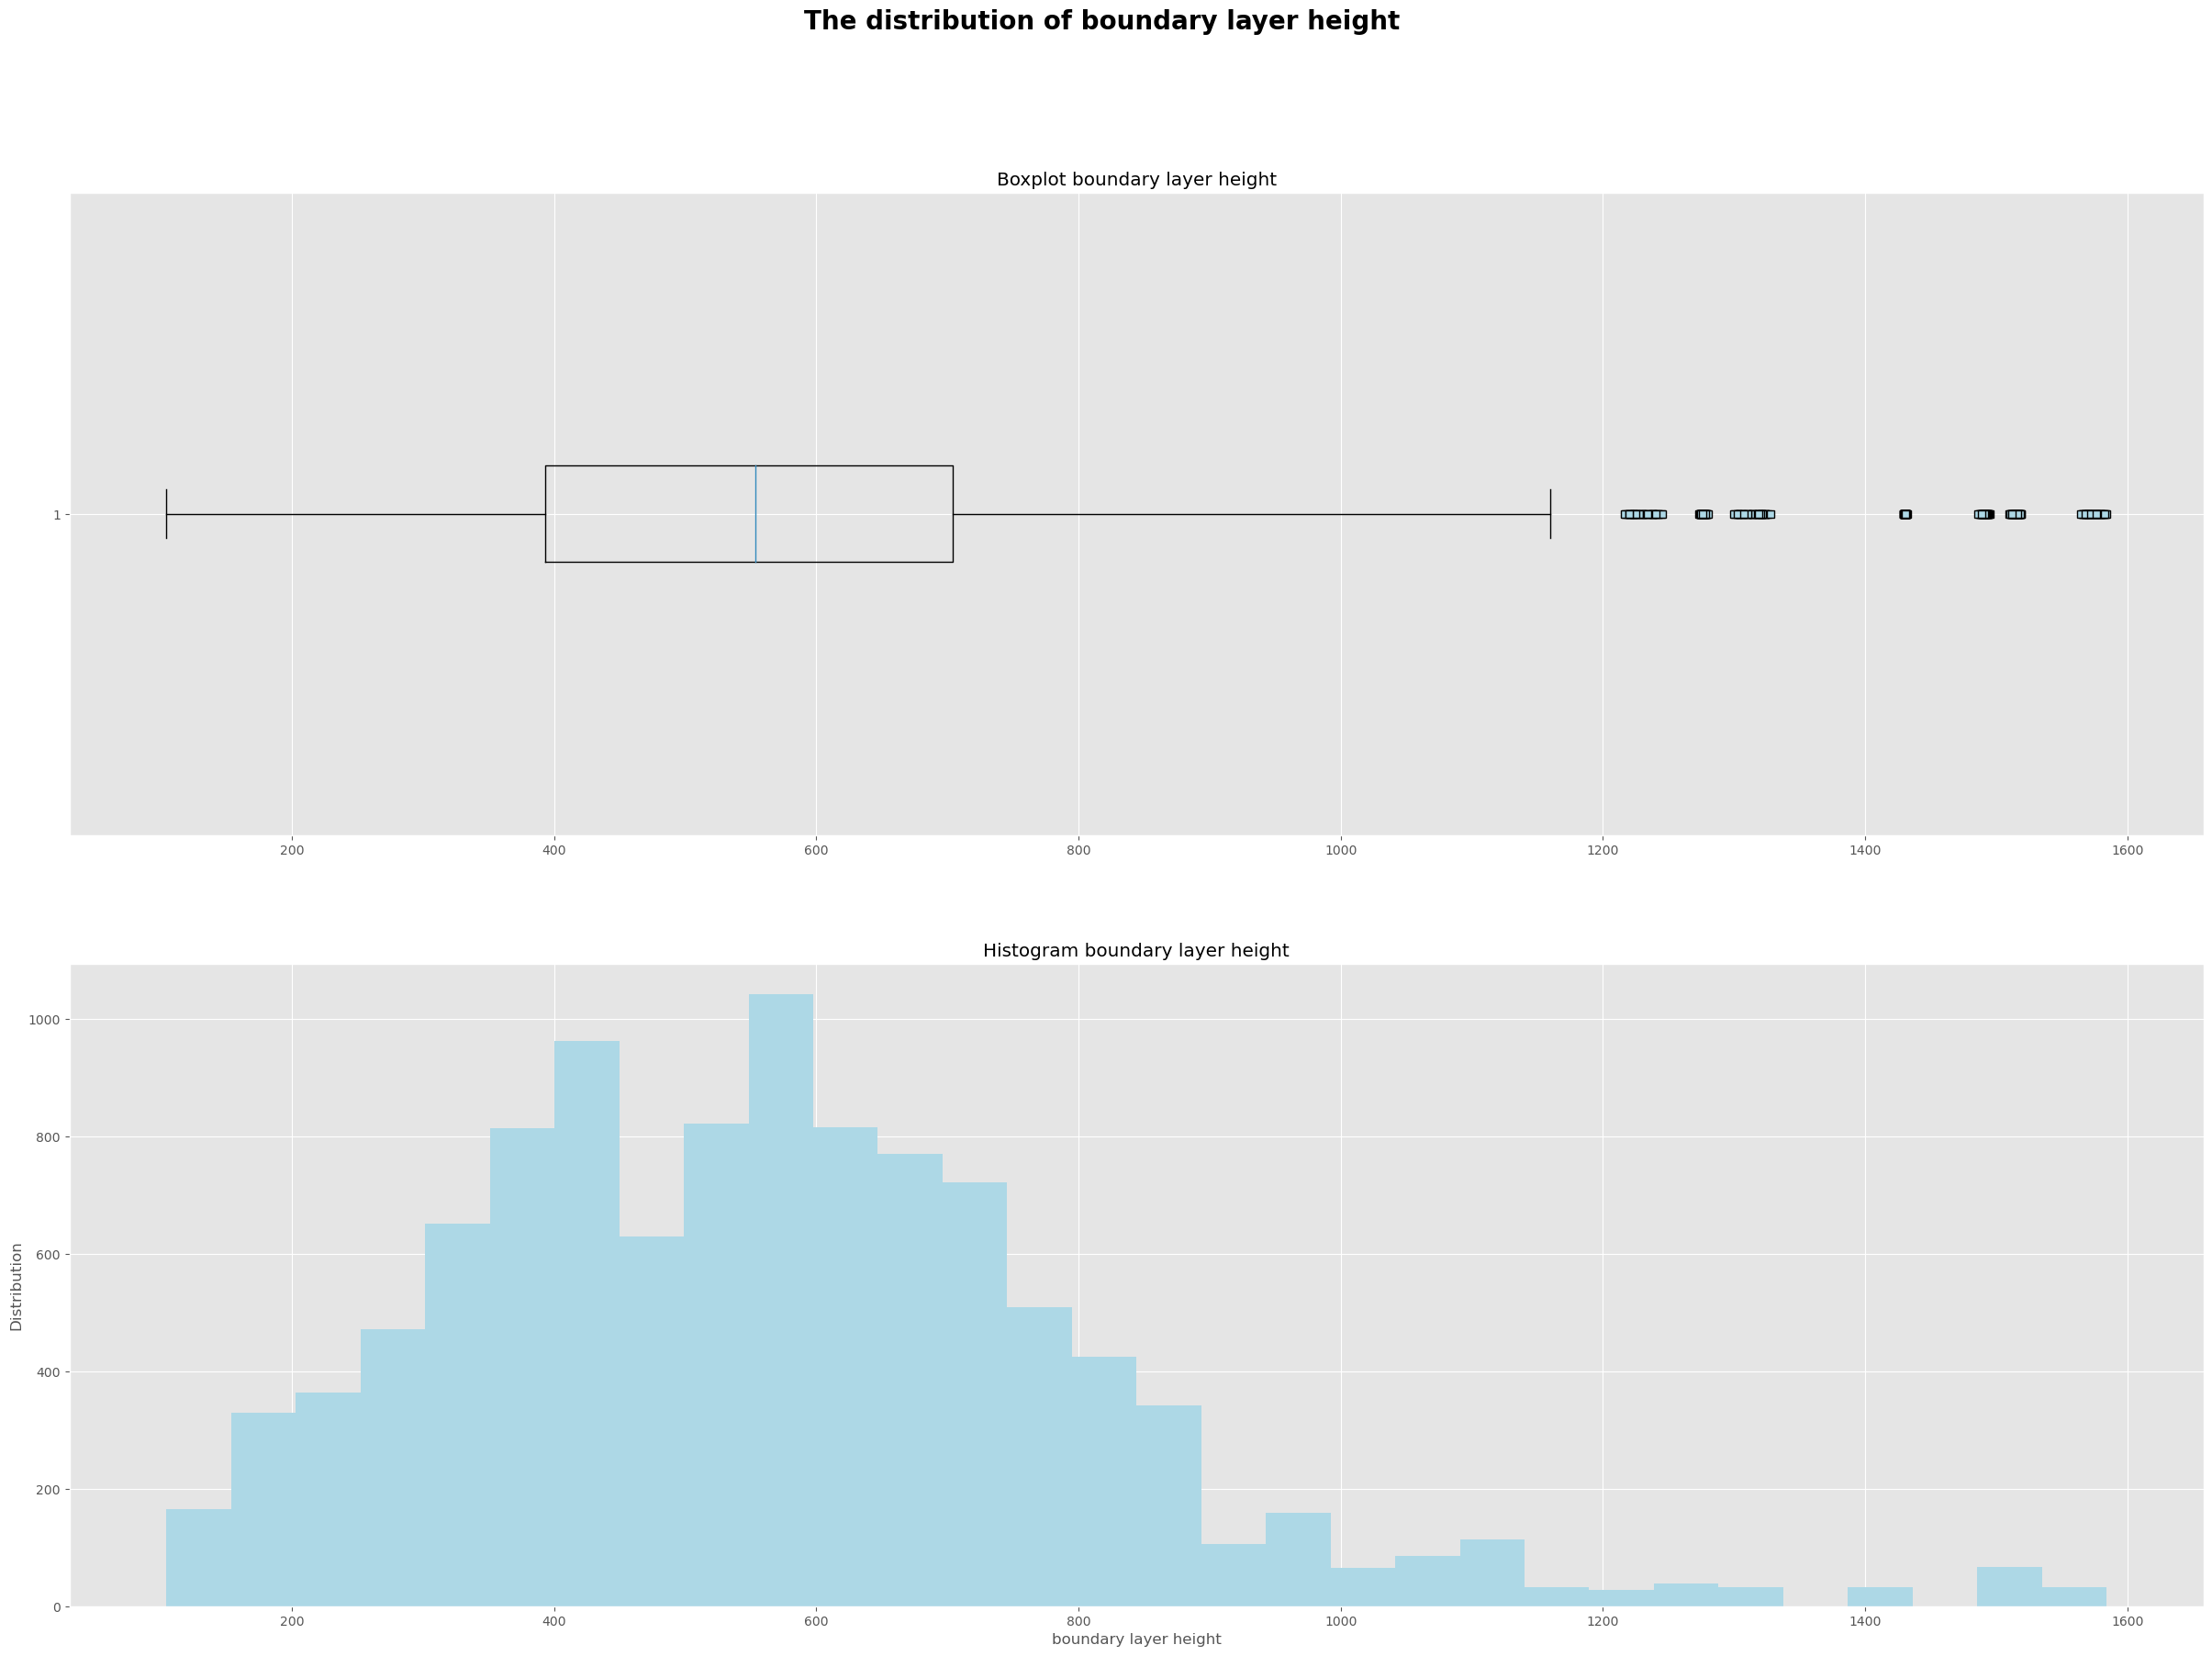

In [34]:
visualizeDistribution(df, "blh", "boundary layer height")

In [35]:
replace_outliers_iqr(df_replaced_iqr_outliers_weekly, "blh")

<h4><font color=mediumvioletred>Check boundary layer height distribution in df_replaced_iqr_outliers_weekly</font></h4>

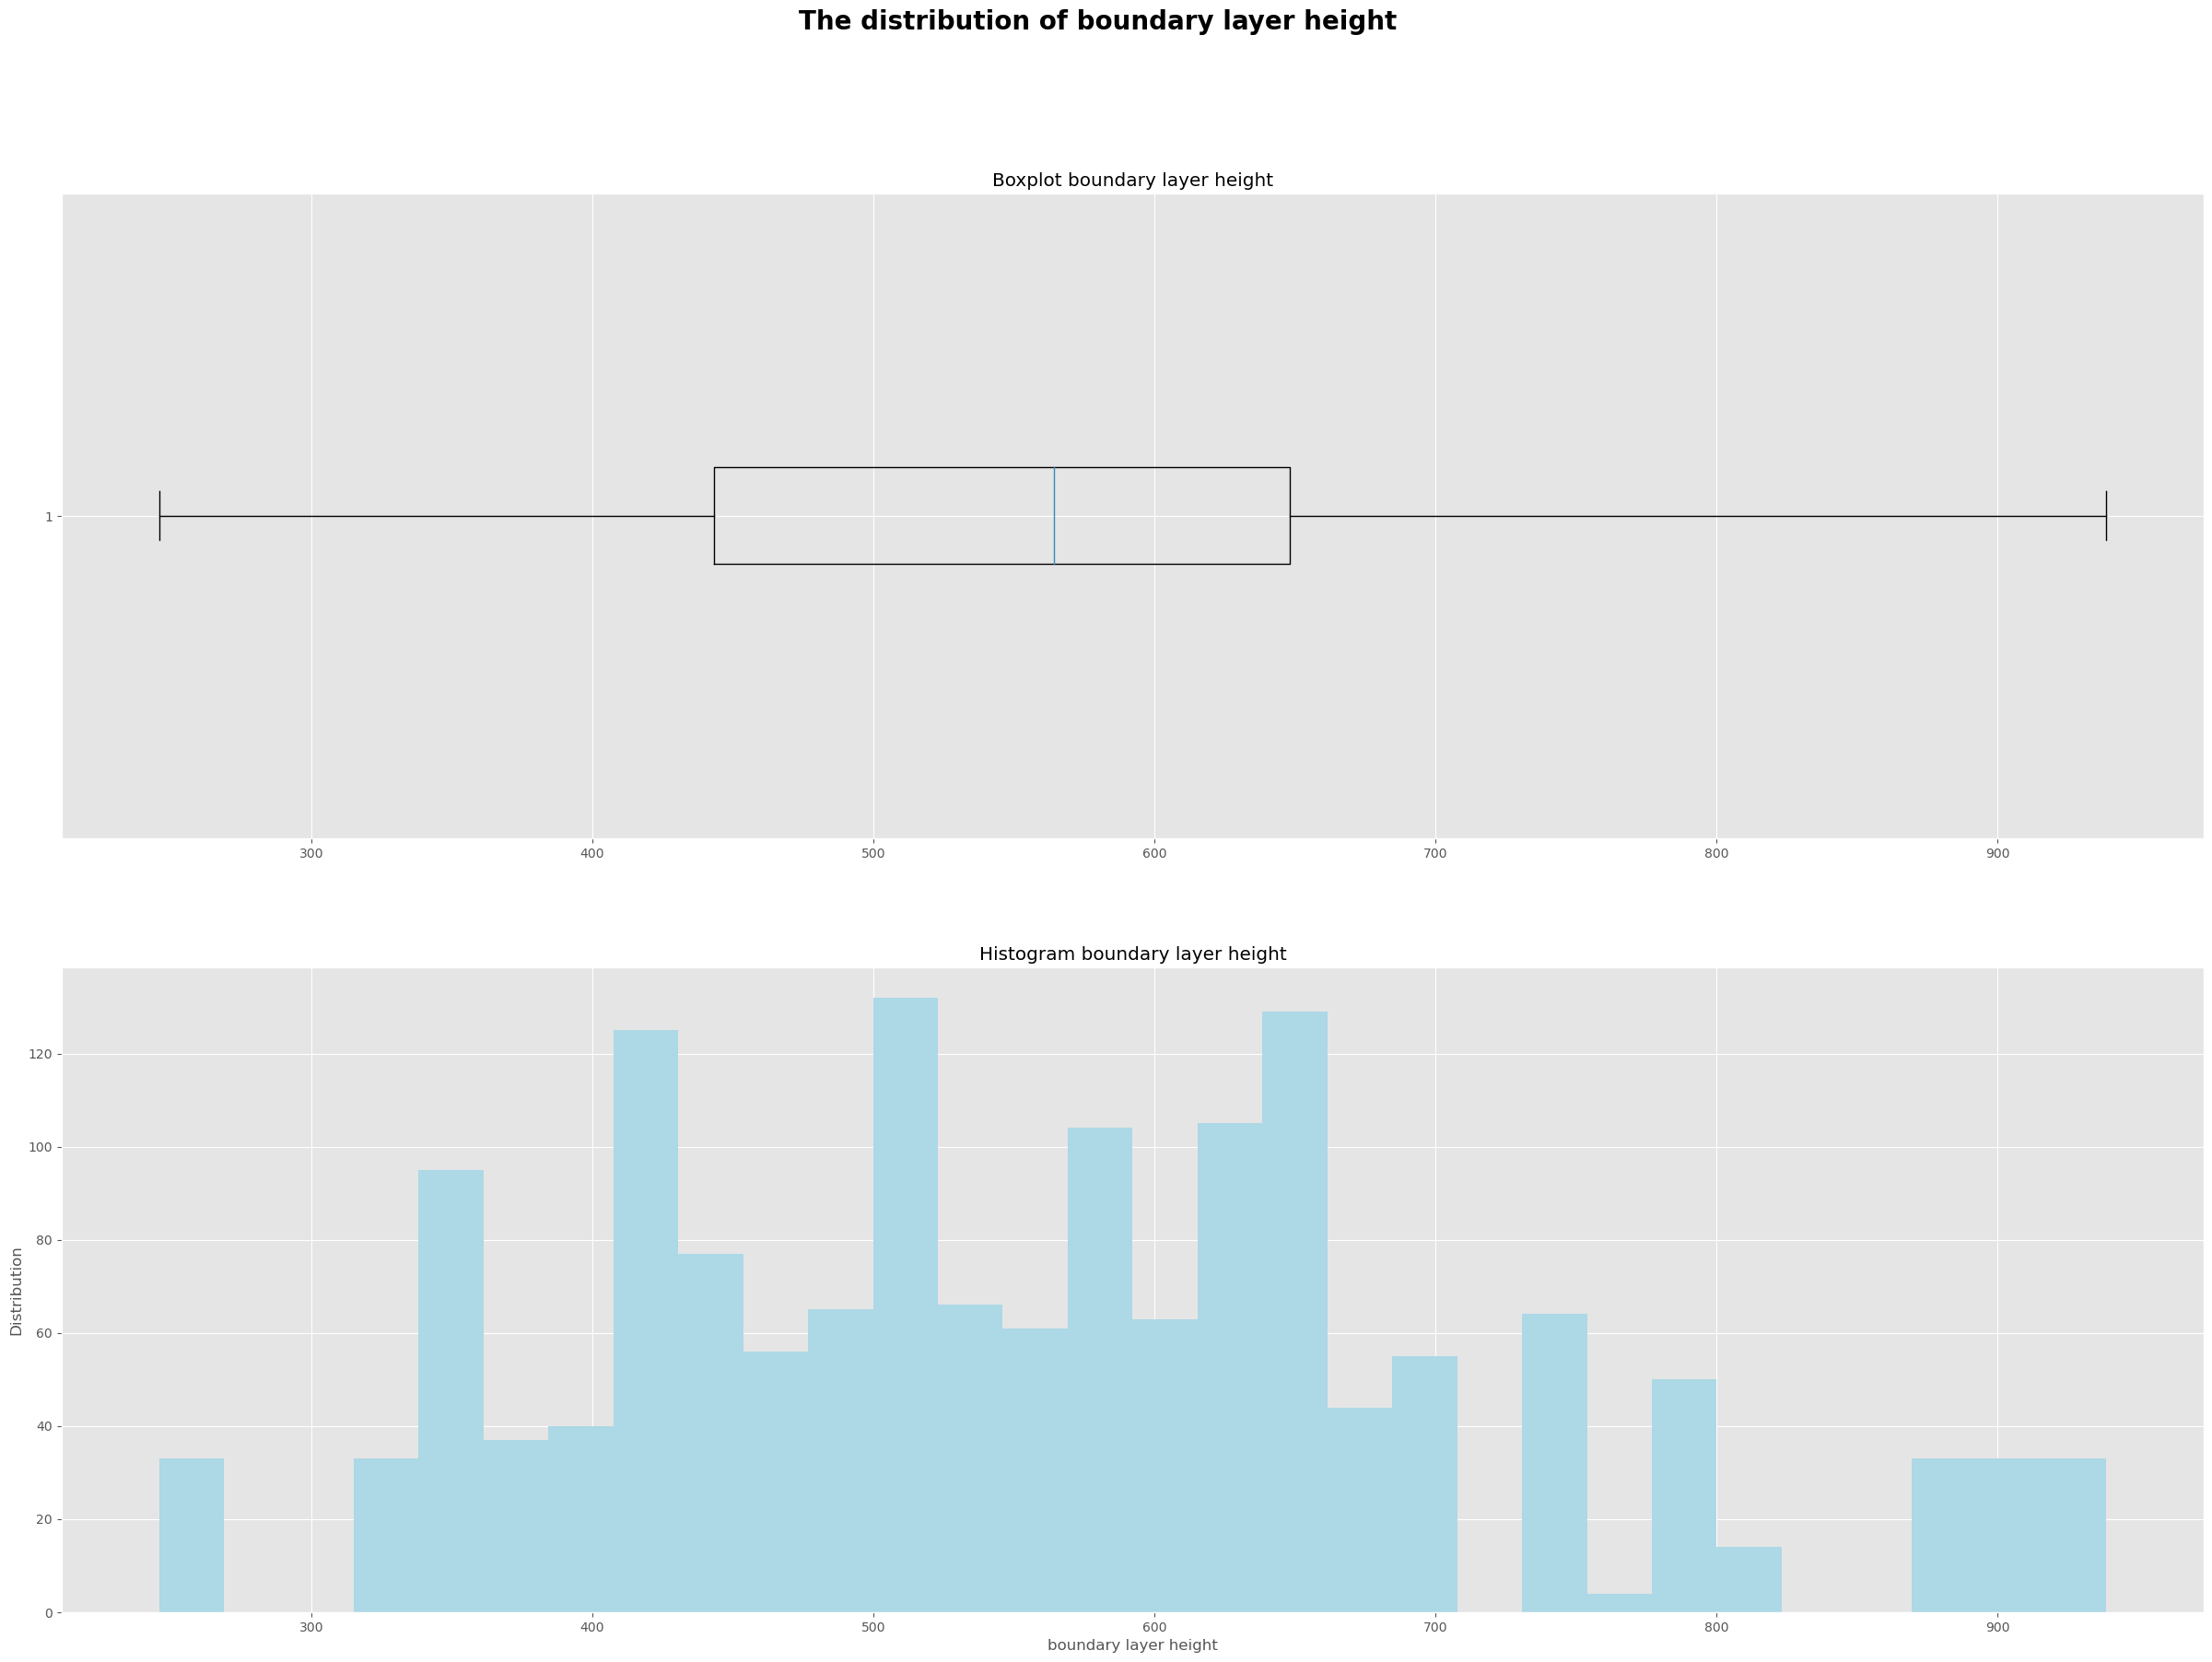

In [36]:
visualizeDistribution(df_replaced_iqr_outliers_weekly, "blh", "boundary layer height")

<h4><font color=mediumvioletred>Replace wind speed outliers </font></h4>

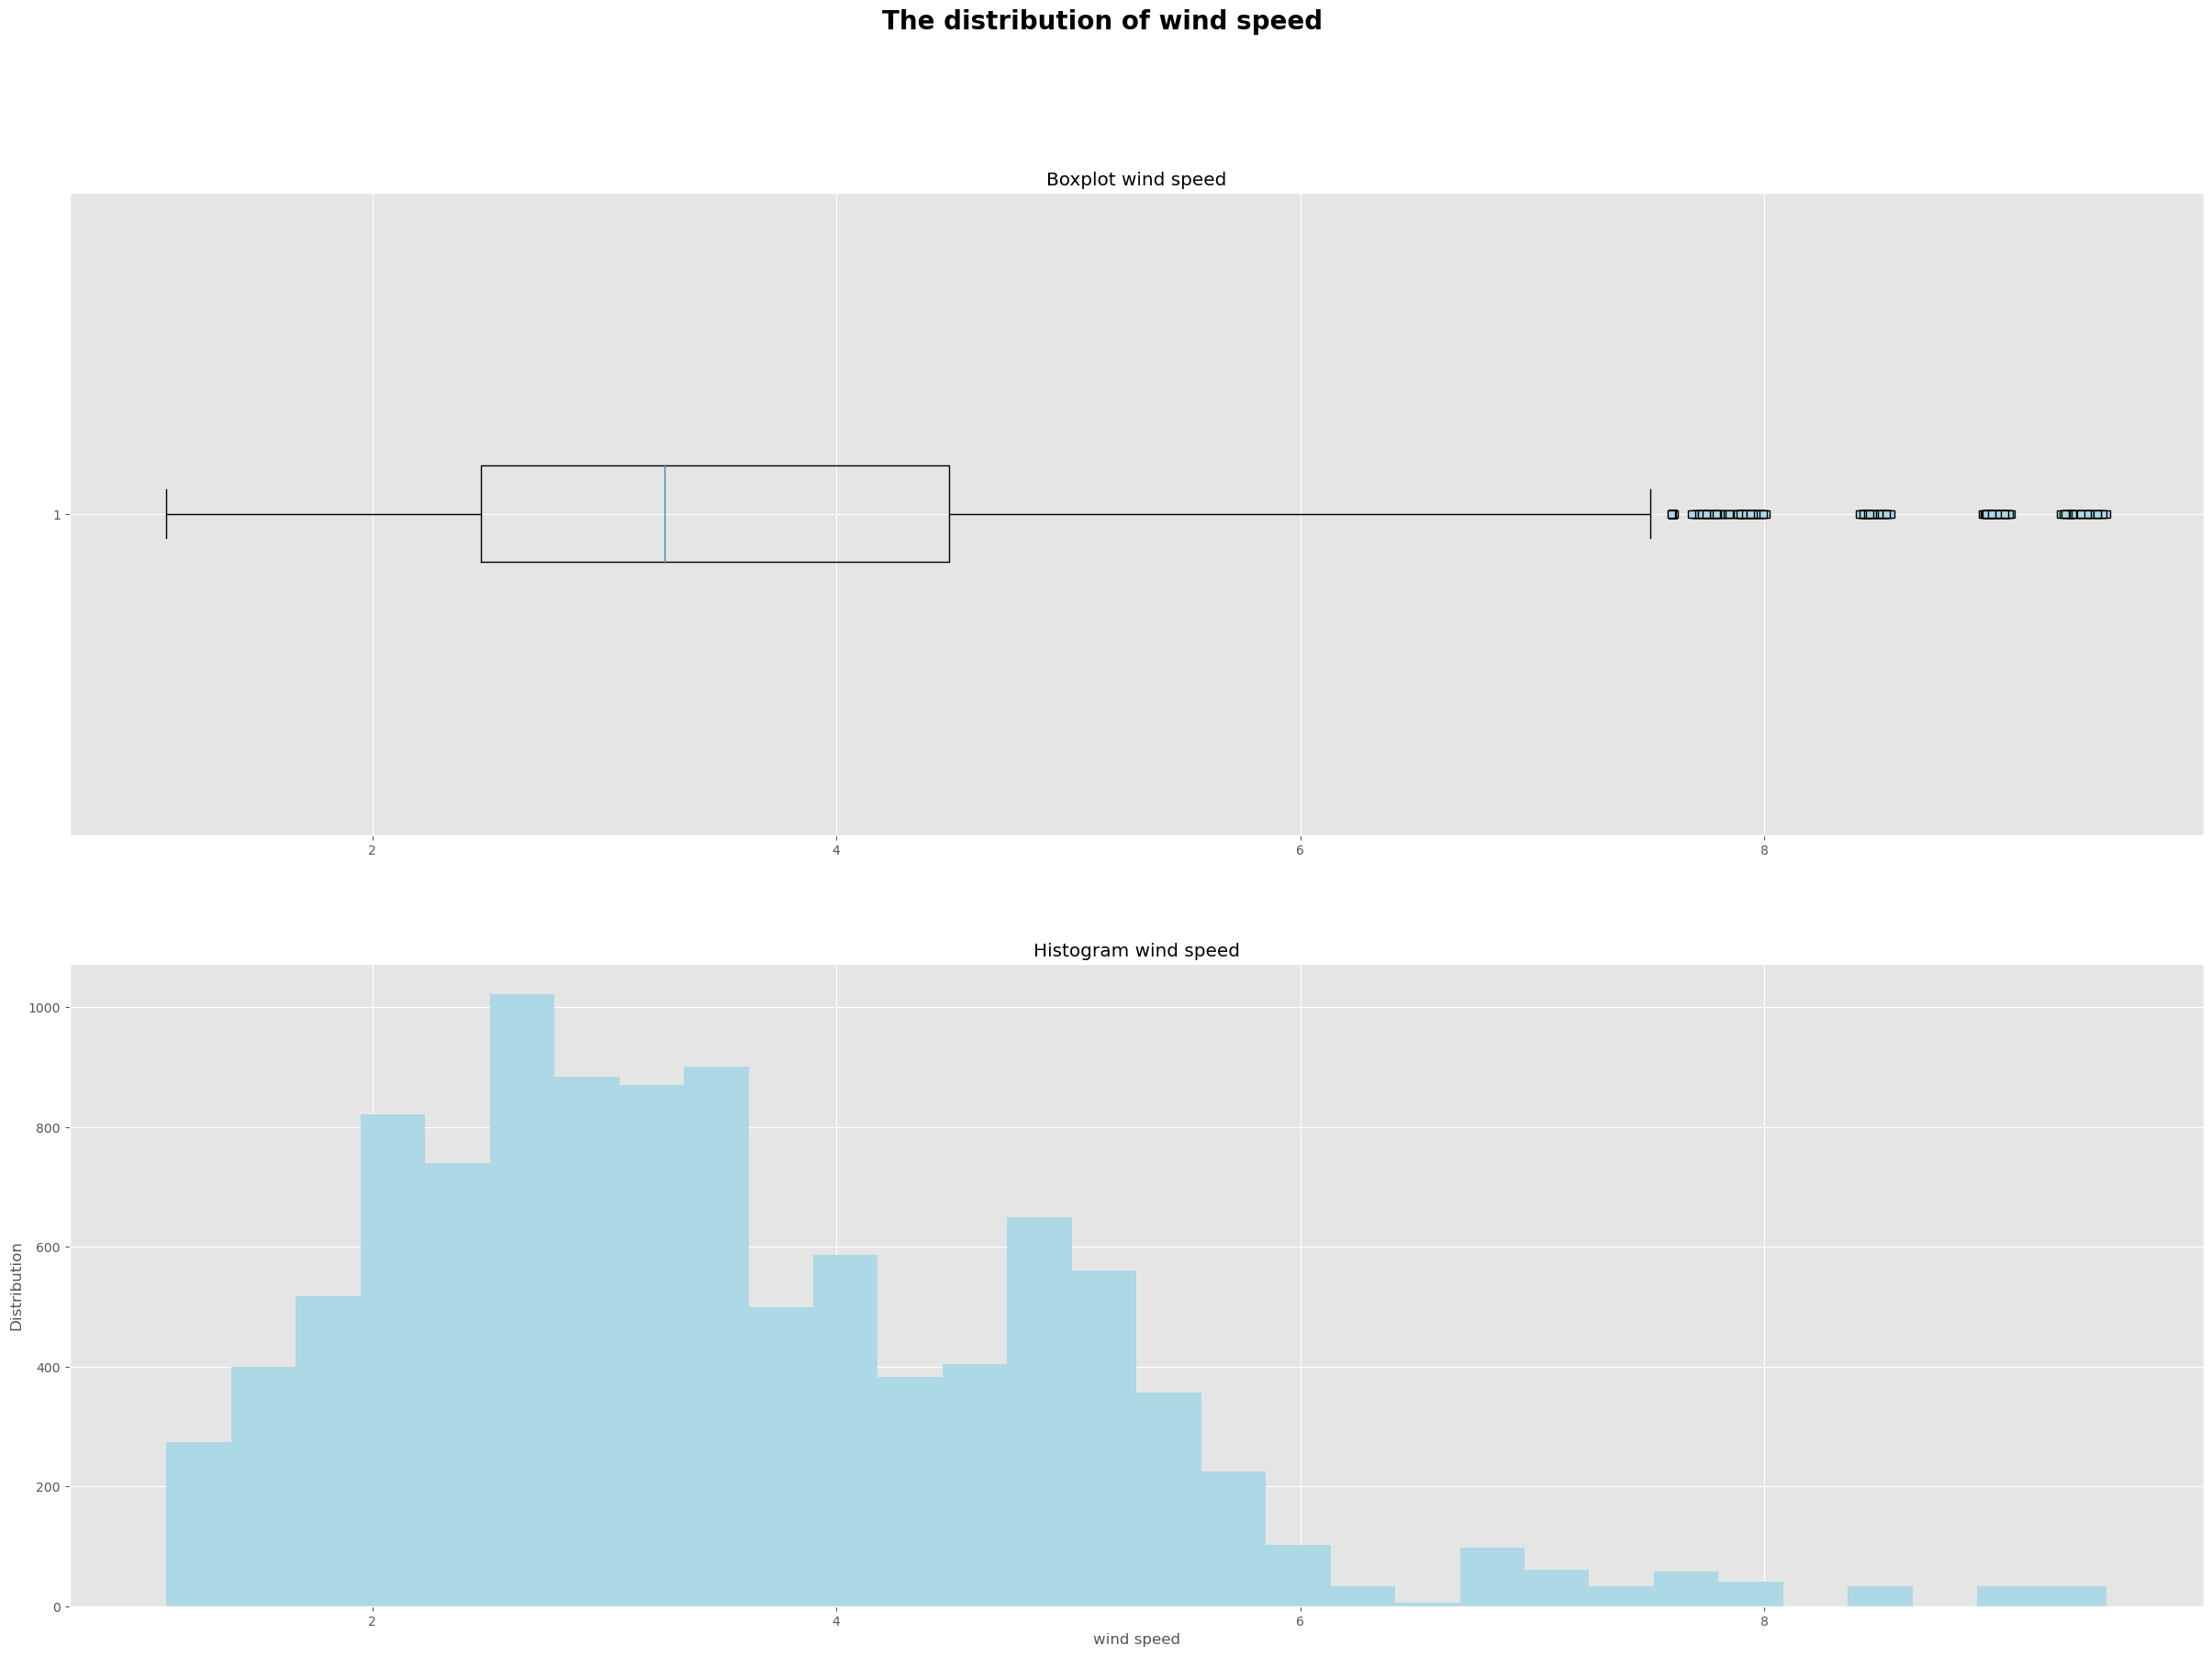

In [37]:
visualizeDistribution(df, "ws", "wind speed")

In [38]:
replace_outliers_iqr(df_replaced_iqr_outliers_weekly, "ws")

<h4><font color=mediumvioletred>Check wind speed distribution in df_replaced_iqr_outliers_weekly</font></h4>

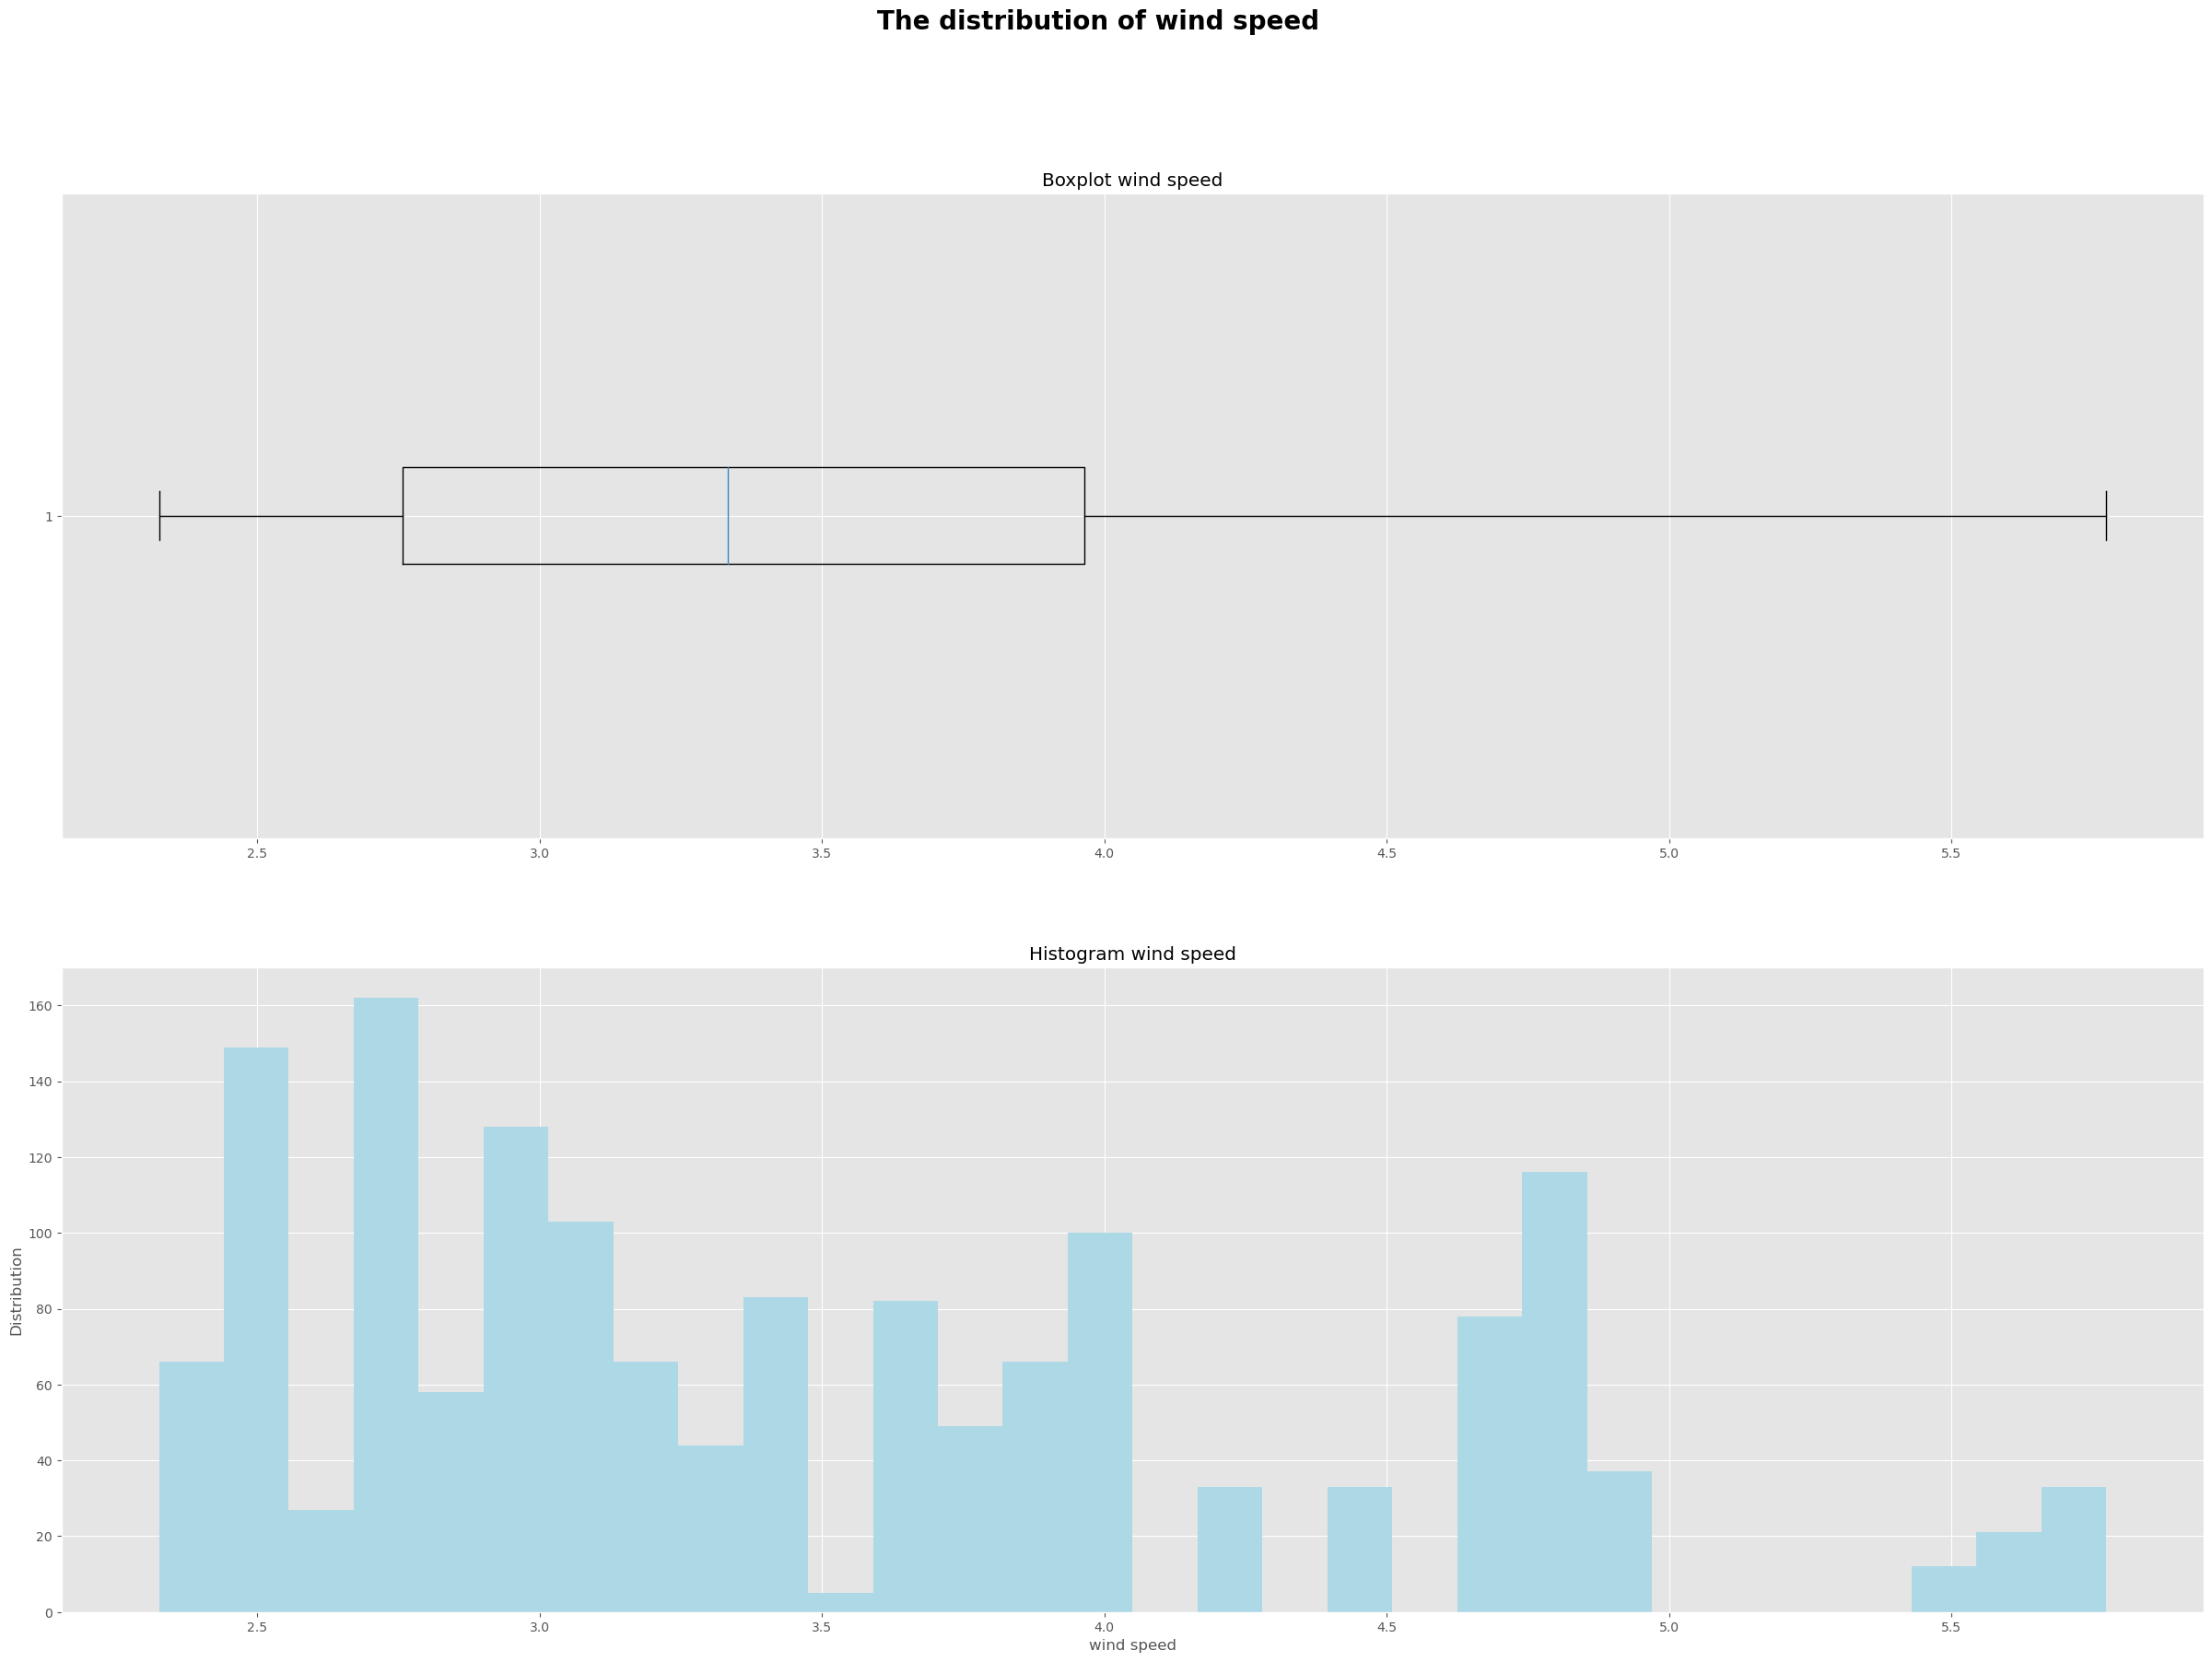

In [39]:
visualizeDistribution(df_replaced_iqr_outliers_weekly, "ws", "wind speed")

<h4><font color=mediumvioletred>Export df_replaced_iqr_outliers_weekly to csv</font></h4>

In [40]:
df_replaced_iqr_outliers_weekly.to_csv("data/df_replaced_iqr_outliers_weekly.csv", index=False)